# Deep Weight Initialization Issue;
This jupyter/ipython notebook is designed to show the affect of improperly initialized data. Start with just using the idea of Gaussian initialization (and build from there). The depth of the network is 10 layers with 500 features per-layer. Start by construct the batch that will be input (D).

In [1]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

#Gaussian 10-D input
D = np.random.randn(1000,500)
hidden_layer_sizes = [500] * 10

act = { 'relu' : lambda x : np.maximum(x,0),
        'tanh' : lambda x : np.tanh(x) }

non_linearities = ['tanh'] * len(hidden_layer_sizes)

## $$\tanh(x)$$
Starting with the `tanh(x)` activation.
1. `Hs` will be used to store the output after each affine connection and activation;
2. `X` in side the loop is a variable used to store the layers input
3. `W` will be randomly initialized (in order to show behaviour)

In [2]:
Hs  = {} # diction to be used for storing the output of each activation layer;
Ws  = {}

for idx, x in enumerate(hidden_layer_sizes):
    X = D if idx == 0 else Hs[idx-1]
    # input at this layer comes from the prior layer
    fan_in  = X.shape[1]
    fan_out = hidden_layer_sizes[idx] 
    W = np.random.randn(fan_in, fan_out) * 0.01
    Ws[idx] = W
    #default initialization
    
    H = np.dot(X, W)
    H = act[non_linearities[idx]](H)
    #affine transformation and then use the activation function
    #there is no bias :D
    Hs[idx] = H

## Statistics of the output of each layer

input layer had mean -0.000588313 and std 1.00104
Hidden layer 0 had mean -0.000914848 and std 0.213896
Hidden layer 1 had mean -1.76606e-05 and std 0.0478172
Hidden layer 2 had mean 1.70244e-05 and std 0.0106679
Hidden layer 3 had mean -1.7355e-06 and std 0.0023924
Hidden layer 4 had mean -4.84136e-07 and std 0.000537381
Hidden layer 5 had mean -3.0742e-07 and std 0.000119625
Hidden layer 6 had mean 1.66555e-09 and std 2.67641e-05
Hidden layer 7 had mean 2.3584e-08 and std 5.96235e-06
Hidden layer 8 had mean 5.34575e-11 and std 1.33559e-06
Hidden layer 9 had mean -3.05201e-10 and std 2.97833e-07


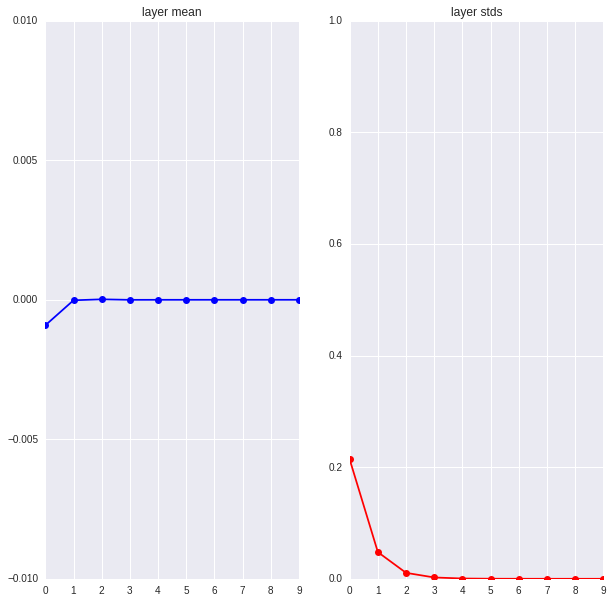

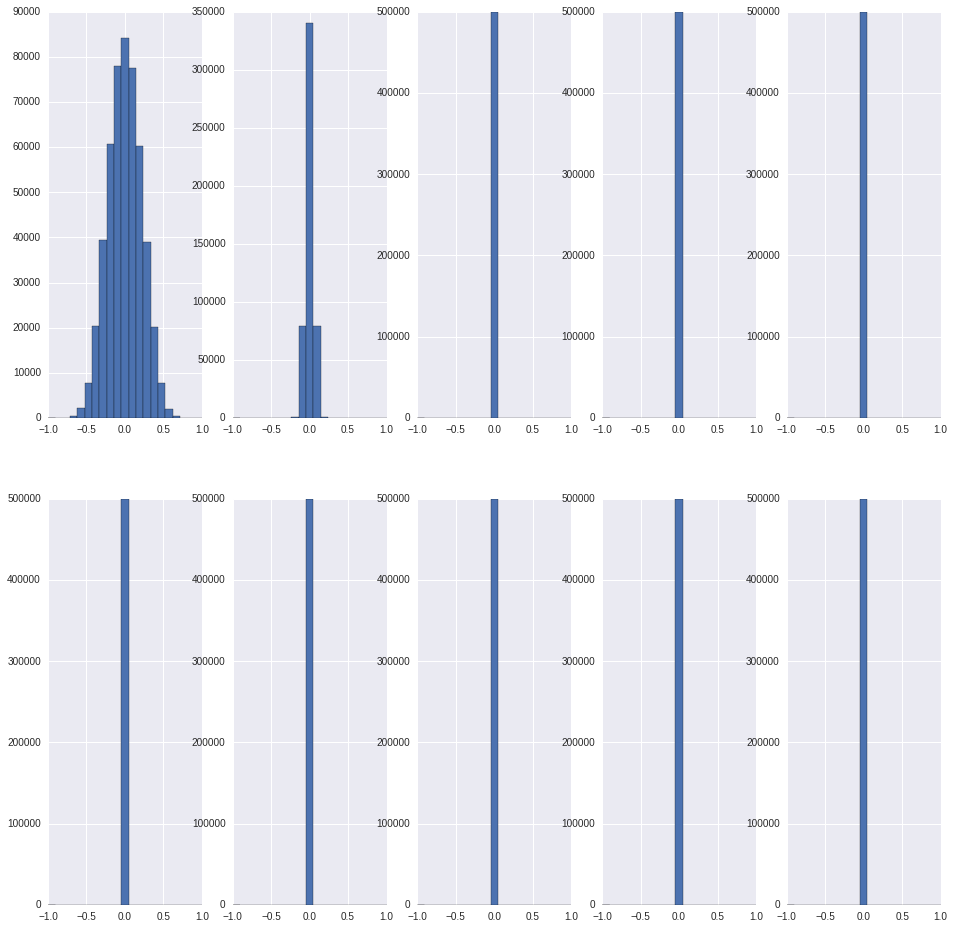

In [3]:
print("input layer had mean %g and std %g" % (np.mean(D), np.std(D)))
layer_means = [ np.mean(H) for i,H in Hs.items() ]
layer_stds  = [ np.std(H) for i,H in Hs.items() ]

for i,H in Hs.items():
    print("Hidden layer %d had mean %g and std %g" % (i, np.mean(H), np.std(H)))

#plot the means and standard deviations
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-')
ax1 = plt.subplot(121)
ax1.set_ylim([-0.01,0.01])
plt.title('layer mean')

plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'or-')
ax1 = plt.subplot(122)
ax1.set_ylim([0.,1.0])
plt.title('layer stds')

plt.figure(figsize=(16,16))
for i,H in Hs.items():
    plt.subplot( 2, len(Hs) // 2, i+1)
    plt.hist(H.ravel(), 21, range=(-1,1))


/home/gking/.virtualenvs/tensorflow3_build/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


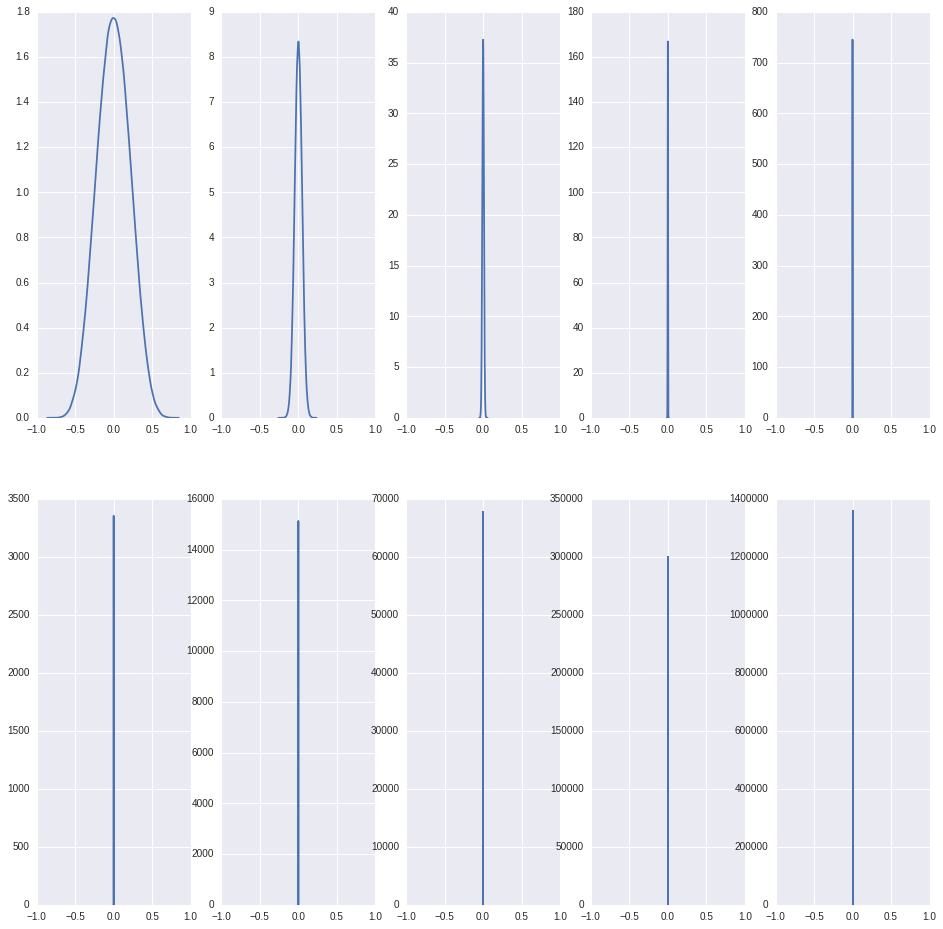

In [4]:
#kde plots
plt.figure(figsize=(16,16))
for i,H in Hs.items():
    plt.subplot( 2, len(Hs) // 2, i+1)
    sns.kdeplot(data=H.ravel())
    ax = plt.subplot( 2, len(Hs) // 2, i+1)
    ax.set_xlim([-1.0,1.0])

## Do we have a **Problem?**
After layer 2. Can see that the variance of the output from layer 3 on is very small. In otherwords - almost all the activations are **0**. What does this mean for the gradients? Lets start with an input of all ones. So the following (using backpropagation rules) and neglecting the activation derivative (in all cases for `tanh(x)` and `relu(x)` the derivative is always going to be strictly less than or equal to **1**):
```
W_grad = np.dot(X.T,dout)
dx     = np.dot(dout, W.T)
```
if `dout` is the output from the layer above, gradient of W (and dx) are the two outputs (neglecting bias) for every layer. So proceeding backwards from the final layer with simplified loss model (is done below);

W_grad layer 9 had mean 5.34575e-08 and std 4.03545e-05
W_grad layer 8 had mean -5.13627e-09 and std 4.03659e-05
W_grad layer 7 had mean 9.00701e-10 and std 3.97848e-05
W_grad layer 6 had mean 1.40924e-07 and std 4.22205e-05
W_grad layer 5 had mean -5.61116e-08 and std 4.07555e-05
W_grad layer 4 had mean 2.2841e-08 and std 4.13454e-05
W_grad layer 3 had mean 1.52873e-07 and std 4.10144e-05
W_grad layer 2 had mean -2.23479e-08 and std 4.06973e-05
W_grad layer 1 had mean 4.60557e-08 and std 4.19568e-05
W_grad layer 0 had mean 2.9112e-08 and std 4.24724e-05
dx layer 9 had mean -0.000217786 and std 0.218534
dx layer 8 had mean 0.000540784 and std 0.0456074
dx layer 7 had mean -0.000458408 and std 0.0104145
dx layer 6 had mean 0.0001159 and std 0.00237245
dx layer 5 had mean -1.31611e-05 and std 0.000527384
dx layer 4 had mean 8.97966e-06 and std 0.000115302
dx layer 3 had mean 1.26425e-06 and std 2.60727e-05
dx layer 2 had mean -5.09552e-08 and std 6.07607e-06
dx layer 1 had mean -6.36461e

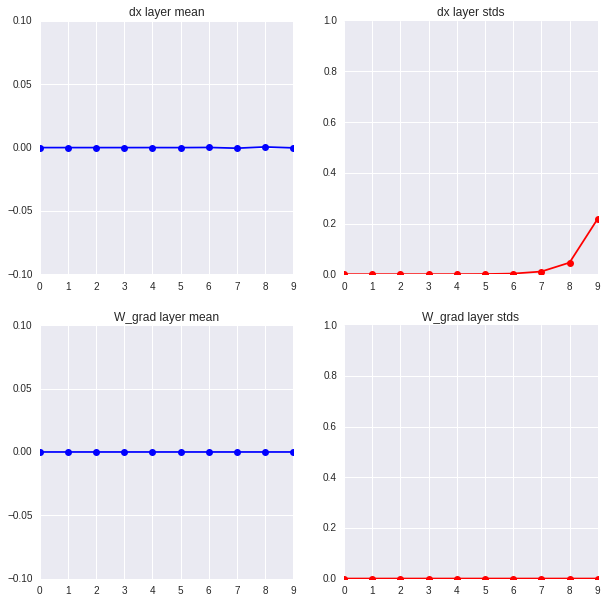

In [5]:
Dx = {}
W_grad = {}
dout = np.ones((1000,500))

for i, H in reversed(list(Hs.items())):
#     W_grad[i] = np.dot(Hs[i].T, dout)
#     dout = np.dot(dout, Ws[i].T)
#     Dx[i] = dout
# ABOVE is without activation modification
    X = D if i == 0 else Hs[i-1]
    dact = (1 - np.square(np.tanh(Hs[i]))) * dout
    W_grad[i] = np.dot(dact.T, X) 
    dout = np.dot(dact, Ws[i].T)
    Dx[i] = dout

layer_means_dx = [ np.mean(H) for i,H in reversed(list(Dx.items())) ]
layer_stds_dx  = [ np.std(H) for i,H in reversed(list(Dx.items())) ]

layer_means_W_grad = [ np.mean(H) for i,H in reversed(list(W_grad.items())) ]
layer_stds_W_grad  = [ np.std(H) for i,H in reversed(list(W_grad.items())) ]

for i,W in reversed(list(W_grad.items())):
    print("W_grad layer %d had mean %g and std %g" % (i, np.mean(W), np.std(W)))

for i,dx in reversed(list(Dx.items())):
    print("dx layer %d had mean %g and std %g" % (i, np.mean(dx), np.std(dx)))

plt.figure(figsize=(10,10))

x_points = list(reversed(list(Dx.keys())))
plt.subplot(221)
plt.plot(x_points, layer_means_dx, 'ob-')
ax = plt.subplot(221)
ax.set_ylim([-0.1,0.1])
plt.title('dx layer mean')

plt.subplot(222)
plt.plot(x_points, layer_stds_dx, 'or-')
ax = plt.subplot(222)
ax.set_ylim([-0.001,1.])
plt.title('dx layer stds')

plt.subplot(223)
plt.plot(x_points, layer_means_W_grad, 'ob-')
ax = plt.subplot(223)
ax.set_ylim([-0.1,0.1])
plt.title('W_grad layer mean')

plt.subplot(224)
plt.plot(x_points, layer_stds_W_grad, 'or-')
ax = plt.subplot(224)
ax.set_ylim([-0.001,1.])
plt.title('W_grad layer stds')

# Gradient Alteration

Suppose that the gradient of the loss was actually initialized randomly (instead). Does this imporve the situation?

W_grad layer 9 had mean -6.94673e-08 and std 2.43088e-05
W_grad layer 8 had mean -4.94555e-08 and std 2.43708e-05
W_grad layer 7 had mean 7.37733e-08 and std 2.45611e-05
W_grad layer 6 had mean 2.46564e-08 and std 2.46908e-05
W_grad layer 5 had mean -1.67117e-08 and std 2.45354e-05
W_grad layer 4 had mean -1.32737e-08 and std 2.46112e-05
W_grad layer 3 had mean 1.28296e-08 and std 2.44146e-05
W_grad layer 2 had mean -6.85113e-08 and std 2.45528e-05
W_grad layer 1 had mean 3.86803e-08 and std 2.44368e-05
W_grad layer 0 had mean 7.82508e-08 and std 2.44163e-05
dx layer 9 had mean 1.2677e-06 and std 0.129134
dx layer 8 had mean -2.47629e-06 and std 0.028933
dx layer 7 had mean 1.16089e-05 and std 0.00646992
dx layer 6 had mean -1.35925e-06 and std 0.00144238
dx layer 5 had mean 3.1865e-07 and std 0.000324881
dx layer 4 had mean 2.58787e-08 and std 7.24641e-05
dx layer 3 had mean 1.21672e-08 and std 1.6236e-05
dx layer 2 had mean 2.85546e-09 and std 3.61136e-06
dx layer 1 had mean 4.62557e

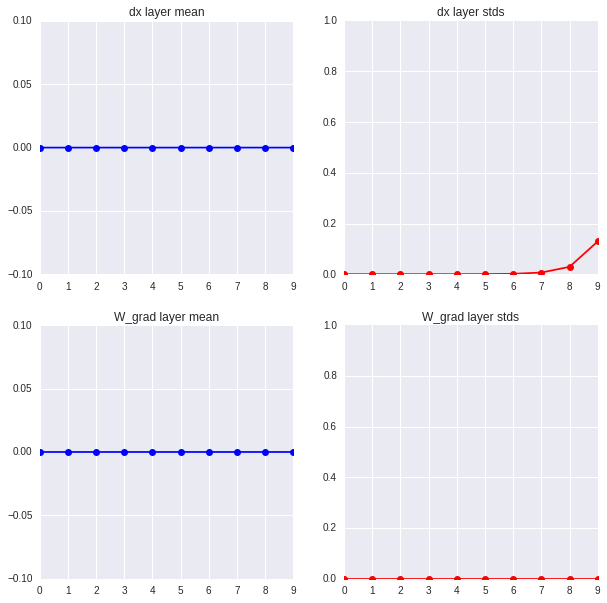

In [6]:
Dx = {}
W_grad = {}
dout = np.random.uniform(low=-1., high=1.,size=(1000,500))

for i, H in reversed(list(Hs.items())):
#     W_grad[i] = np.dot(Hs[i].T, dout)
#     dout = np.dot(dout, Ws[i].T)
#     Dx[i] = dout
# ABOVE is without activation modification
    X = D if i == 0 else Hs[i-1]
    dact = (1 - np.square(np.tanh(Hs[i]))) * dout
    W_grad[i] = np.dot(dact.T, X) 
    dout = np.dot(dact, Ws[i].T)
    Dx[i] = dout

layer_means_dx = [ np.mean(H) for i,H in reversed(list(Dx.items())) ]
layer_stds_dx  = [ np.std(H) for i,H in reversed(list(Dx.items())) ]

layer_means_W_grad = [ np.mean(H) for i,H in reversed(list(W_grad.items())) ]
layer_stds_W_grad  = [ np.std(H) for i,H in reversed(list(W_grad.items())) ]

for i,W in reversed(list(W_grad.items())):
    print("W_grad layer %d had mean %g and std %g" % (i, np.mean(W), np.std(W)))

for i,dx in reversed(list(Dx.items())):
    print("dx layer %d had mean %g and std %g" % (i, np.mean(dx), np.std(dx)))

plt.figure(figsize=(10,10))

x_points = list(reversed(list(Dx.keys())))
plt.subplot(221)
plt.plot(x_points, layer_means_dx, 'ob-')
ax = plt.subplot(221)
ax.set_ylim([-0.1,0.1])
plt.title('dx layer mean')

plt.subplot(222)
plt.plot(x_points, layer_stds_dx, 'or-')
ax = plt.subplot(222)
ax.set_ylim([-0.001,1.])
plt.title('dx layer stds')

plt.subplot(223)
plt.plot(x_points, layer_means_W_grad, 'ob-')
ax = plt.subplot(223)
ax.set_ylim([-0.1,0.1])
plt.title('W_grad layer mean')

plt.subplot(224)
plt.plot(x_points, layer_stds_W_grad, 'or-')
ax = plt.subplot(224)
ax.set_ylim([-0.001,1.])
plt.title('W_grad layer stds')

## What does this mean for training?
From above, see that the gradients are almost all zero. This is really **BAD** (stocastic gradient descent relies upon having a non-negligible gradient in order to shift the weights). Further, the gradient of the layer inputs gets smaller and smaller with each step backwards into the network.

## What about using a larger weight parameter?
The weight parameter of `0.01` seemed arbitrary (**it was**). What happens is we changes this the initialization parameter to something much larger. Lets try using: `1.`

input layer had mean -0.000588313 and std 1.00104
Hidden layer 0 had mean -0.000824172 and std 0.982019
Hidden layer 1 had mean 0.00165287 and std 0.981798
Hidden layer 2 had mean -0.00354191 and std 0.981698
Hidden layer 3 had mean 0.000173501 and std 0.981802
Hidden layer 4 had mean 0.00106918 and std 0.981768
Hidden layer 5 had mean 0.00144127 and std 0.981523
Hidden layer 6 had mean 0.00021608 and std 0.981499
Hidden layer 7 had mean -0.000494024 and std 0.981538
Hidden layer 8 had mean -0.00298992 and std 0.981597
Hidden layer 9 had mean -0.00184233 and std 0.981841


/home/gking/.virtualenvs/tensorflow3_build/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


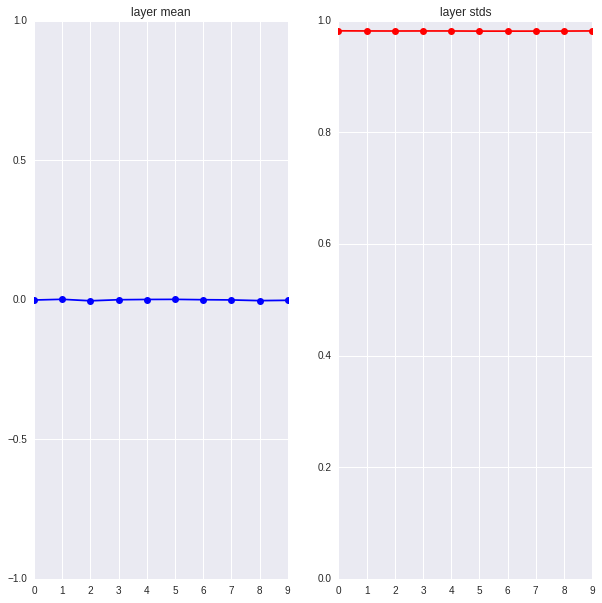

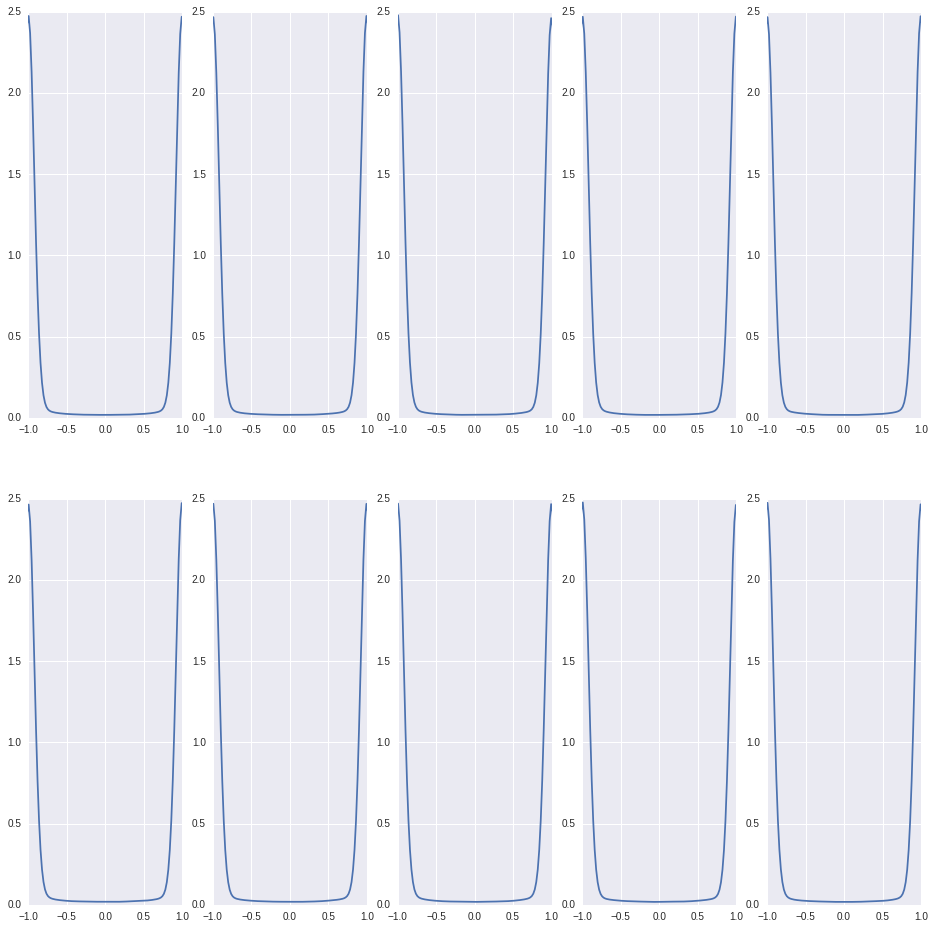

In [7]:
Hs  = {}
Ws  = {}

for idx, x in enumerate(hidden_layer_sizes):
    X = D if idx == 0 else Hs[idx-1]
    # input at this layer comes from the prior layer
    fan_in  = X.shape[1]
    fan_out = hidden_layer_sizes[idx] 
    W = np.random.randn(fan_in, fan_out) * 1.0
    Ws[idx] = W
    #default initialization
    
    H = np.dot(X, W)
    H = act[non_linearities[idx]](H)
    #affine transformation and then use the activation function
    #there is no bias :D
    Hs[idx] = H

print("input layer had mean %g and std %g" % (np.mean(D), np.std(D)))
layer_means = [ np.mean(H) for i,H in Hs.items() ]
layer_stds  = [ np.std(H) for i,H in Hs.items() ]

for i,H in Hs.items():
    print("Hidden layer %d had mean %g and std %g" % (i, np.mean(H), np.std(H)))

#plot the means and standard deviations
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-')
ax1 = plt.subplot(121)
ax1.set_ylim([-1.,1.0])
plt.title('layer mean')

plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'or-')
ax1 = plt.subplot(122)
ax1.set_ylim([0.,1.0])
plt.title('layer stds')

plt.figure(figsize=(16,16))
for i,H in Hs.items():
    plt.subplot( 2, len(Hs) // 2, i+1)
    sns.kdeplot(data=H.ravel())
    ax = plt.subplot( 2, len(Hs) // 2, i+1)
    ax.set_xlim([-1.0,1.0])


W_grad layer 9 had mean -0.00750226 and std 7.94557
W_grad layer 8 had mean -0.214311 and std 79.2238
W_grad layer 7 had mean -3.74935 and std 783.912
W_grad layer 6 had mean -11.3945 and std 7761.09
W_grad layer 5 had mean -202.141 and std 77321.5
W_grad layer 4 had mean -148.962 and std 770985
W_grad layer 3 had mean 13573 and std 7.64972e+06
W_grad layer 2 had mean 218464 and std 7.5605e+07
W_grad layer 1 had mean 1.54122e+06 and std 7.45421e+08
W_grad layer 0 had mean -6.87181e+06 and std 7.57644e+09
dx layer 9 had mean -0.00405537 and std 5.7379
dx layer 8 had mean 0.0723729 and std 56.9147
dx layer 7 had mean -0.60992 and std 565.43
dx layer 6 had mean 7.00619 and std 5623.52
dx layer 5 had mean -95.3924 and std 55610.6
dx layer 4 had mean 526.428 and std 554237
dx layer 3 had mean -5064.5 and std 5.46742e+06
dx layer 2 had mean -24129.8 and std 5.40863e+07
dx layer 1 had mean 269035 and std 5.40423e+08
dx layer 0 had mean -8.38751e+06 and std 5.37285e+09


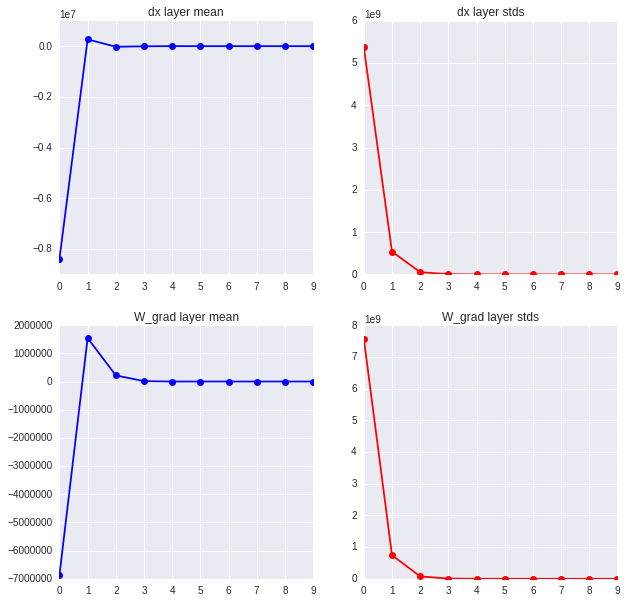

In [8]:
Dx = {}
W_grad = {}
dout = np.random.uniform(low=-1., high=1.,size=(1000,500))

for i, H in reversed(list(Hs.items())):
#     W_grad[i] = np.dot(Hs[i].T, dout)
#     dout = np.dot(dout, Ws[i].T)
#     Dx[i] = dout
    X = D if i == 0 else Hs[i-1]
    dact = (1 - np.square(np.tanh(Hs[i]))) * dout
    W_grad[i] = np.dot(dact.T, X) 
    dout = np.dot(dact, Ws[i].T)
    Dx[i] = dout


layer_means_dx = [ np.mean(H) for i,H in reversed(list(Dx.items())) ]
layer_stds_dx  = [ np.std(H) for i,H in reversed(list(Dx.items())) ]

layer_means_W_grad = [ np.mean(H) for i,H in reversed(list(W_grad.items())) ]
layer_stds_W_grad  = [ np.std(H) for i,H in reversed(list(W_grad.items())) ]

for i,W in reversed(list(W_grad.items())):
    print("W_grad layer %d had mean %g and std %g" % (i, np.mean(W), np.std(W)))

for i,dx in reversed(list(Dx.items())):
    print("dx layer %d had mean %g and std %g" % (i, np.mean(dx), np.std(dx)))

plt.figure(figsize=(10,10))

x_points = list(reversed(list(Dx.keys())))
plt.subplot(221)
plt.plot(x_points, layer_means_dx, 'ob-')
plt.title('dx layer mean')

plt.subplot(222)
plt.plot(x_points, layer_stds_dx, 'or-')
plt.title('dx layer stds')

plt.subplot(223)
plt.plot(x_points, layer_means_W_grad, 'ob-')
plt.title('W_grad layer mean')

plt.subplot(224)
plt.plot(x_points, layer_stds_W_grad, 'or-')
plt.title('W_grad layer stds')

## Instability
From the above plots, we can see that there is a large chance for instability in the lower layers. From this, it would require a very small gradient in order to guaranteee that the lower layers have **small** weight shifts. What if we change the gradient of the loss (doesn't really help)?

W_grad layer 9 had mean -1.31571 and std 13.3865
W_grad layer 8 had mean 0.19541 and std 131.67
W_grad layer 7 had mean 2.44968 and std 1309.15
W_grad layer 6 had mean 34.6121 and std 13008.1
W_grad layer 5 had mean -378.857 and std 123837
W_grad layer 4 had mean -1943.54 and std 1.28803e+06
W_grad layer 3 had mean -83951 and std 1.20904e+07
W_grad layer 2 had mean 340499 and std 1.26123e+08
W_grad layer 1 had mean 2.96806e+06 and std 1.22268e+09
W_grad layer 0 had mean -1.50164e+06 and std 1.13855e+10
dx layer 9 had mean -0.749854 and std 9.62271
dx layer 8 had mean 6.78343 and std 97.2553
dx layer 7 had mean 42.7719 and std 940.813
dx layer 6 had mean -536.979 and std 9101.45
dx layer 5 had mean -5944.36 and std 91883.2
dx layer 4 had mean 49130.4 and std 885602
dx layer 3 had mean 271526 and std 8.83368e+06
dx layer 2 had mean -3.25309e+06 and std 8.13924e+07
dx layer 1 had mean 2.76861e+07 and std 8.0701e+08
dx layer 0 had mean 1.46689e+07 and std 7.79353e+09


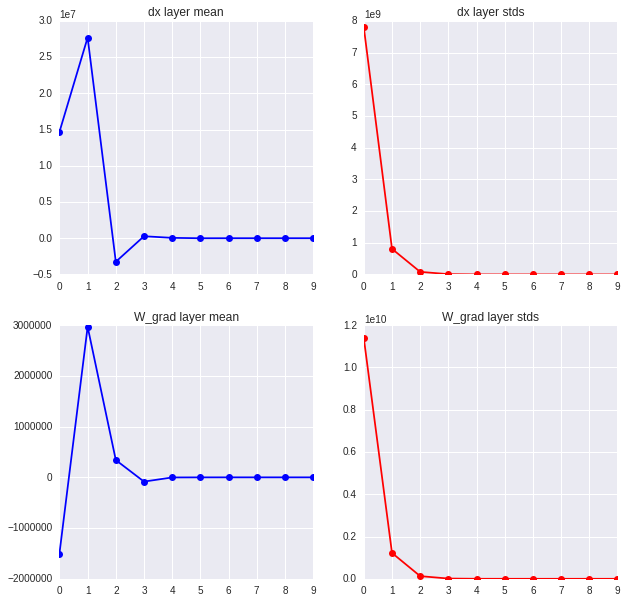

In [9]:
Dx = {}
W_grad = {}
dout = np.ones((1000,500))

for i, H in reversed(list(Hs.items())):
#     W_grad[i] = np.dot(Hs[i].T, dout)
#     dout = np.dot(dout, Ws[i].T)
#     Dx[i] = dout
    X = D if i == 0 else Hs[i-1]
    dact = (1 - np.square(np.tanh(Hs[i]))) * dout
    W_grad[i] = np.dot(dact.T, X) 
    dout = np.dot(dact, Ws[i].T)
    Dx[i] = dout


layer_means_dx = [ np.mean(H) for i,H in reversed(list(Dx.items())) ]
layer_stds_dx  = [ np.std(H) for i,H in reversed(list(Dx.items())) ]

layer_means_W_grad = [ np.mean(H) for i,H in reversed(list(W_grad.items())) ]
layer_stds_W_grad  = [ np.std(H) for i,H in reversed(list(W_grad.items())) ]

for i,W in reversed(list(W_grad.items())):
    print("W_grad layer %d had mean %g and std %g" % (i, np.mean(W), np.std(W)))

for i,dx in reversed(list(Dx.items())):
    print("dx layer %d had mean %g and std %g" % (i, np.mean(dx), np.std(dx)))

plt.figure(figsize=(10,10))

x_points = list(reversed(list(Dx.keys())))
plt.subplot(221)
plt.plot(x_points, layer_means_dx, 'ob-')
plt.title('dx layer mean')

plt.subplot(222)
plt.plot(x_points, layer_stds_dx, 'or-')
plt.title('dx layer stds')

plt.subplot(223)
plt.plot(x_points, layer_means_W_grad, 'ob-')
plt.title('W_grad layer mean')

plt.subplot(224)
plt.plot(x_points, layer_stds_W_grad, 'or-')
plt.title('W_grad layer stds')

## What about using a different weight parameter?
What happens is we changes this the initialization parameter to something much larger than 0.01 and less than 1.0. Lets try using: 0.1.

input layer had mean -0.000588313 and std 1.00104
Hidden layer 0 had mean 0.000306683 and std 0.818418
Hidden layer 1 had mean 0.00014644 and std 0.78008
Hidden layer 2 had mean -0.0025035 and std 0.769778
Hidden layer 3 had mean 0.000752657 and std 0.766216
Hidden layer 4 had mean 0.0013893 and std 0.765911
Hidden layer 5 had mean -0.000135399 and std 0.764425
Hidden layer 6 had mean -0.000233656 and std 0.764964
Hidden layer 7 had mean -0.000397922 and std 0.764526
Hidden layer 8 had mean 0.00119762 and std 0.765239
Hidden layer 9 had mean -0.00124263 and std 0.764005


/home/gking/.virtualenvs/tensorflow3_build/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


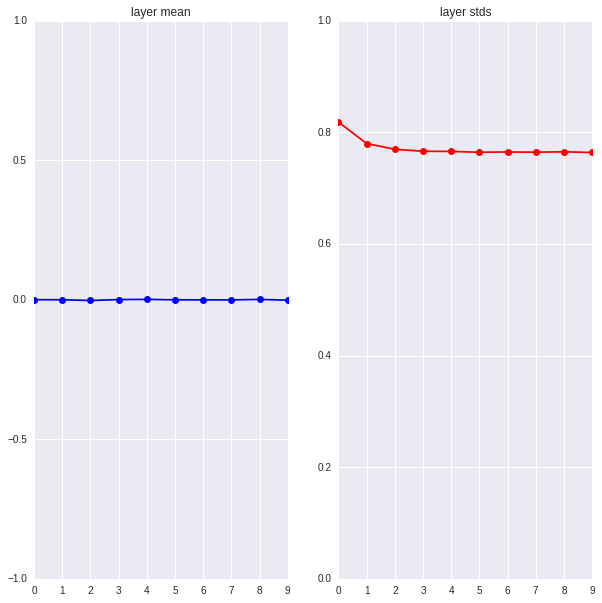

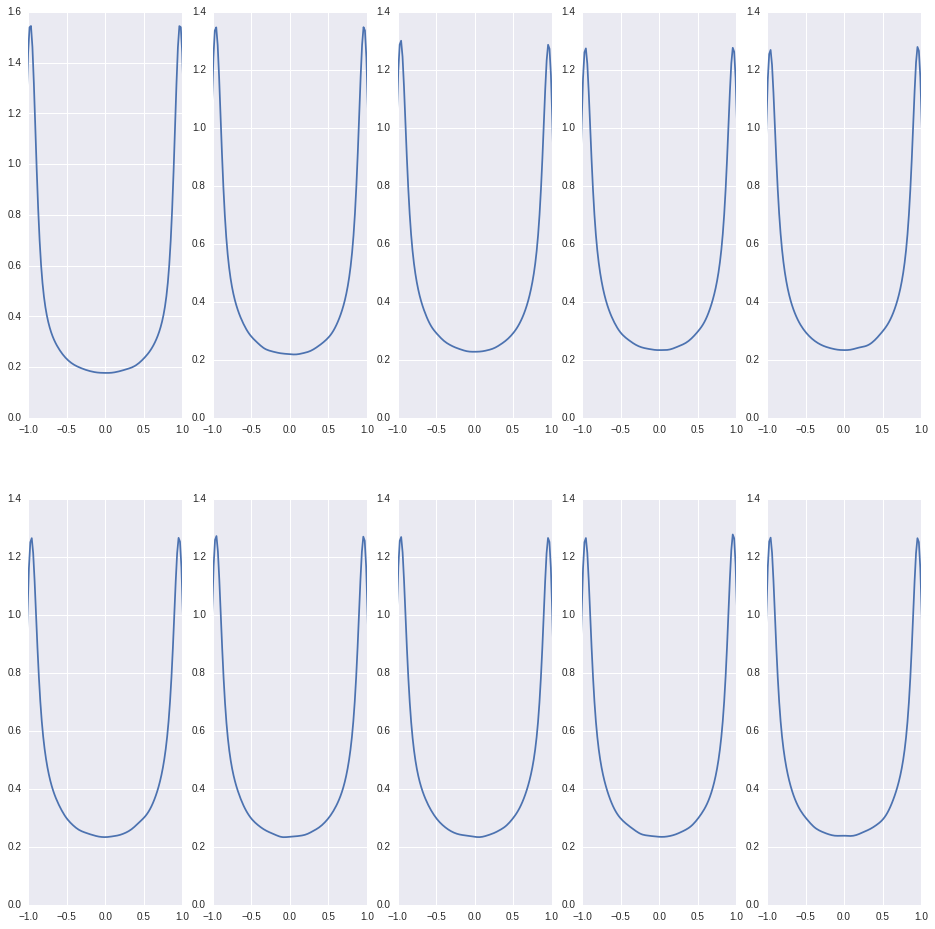

In [10]:
Hs  = {}
Ws  = {}

for idx, x in enumerate(hidden_layer_sizes):
    X = D if idx == 0 else Hs[idx-1]
    # input at this layer comes from the prior layer
    fan_in  = X.shape[1]
    fan_out = hidden_layer_sizes[idx] 
    W = np.random.randn(fan_in, fan_out) * 0.1
    Ws[idx] = W
    #default initialization
    
    H = np.dot(X, W)
    H = act[non_linearities[idx]](H)
    #affine transformation and then use the activation function
    #there is no bias :D
    Hs[idx] = H

print("input layer had mean %g and std %g" % (np.mean(D), np.std(D)))
layer_means = [ np.mean(H) for i,H in Hs.items() ]
layer_stds  = [ np.std(H) for i,H in Hs.items() ]

for i,H in Hs.items():
    print("Hidden layer %d had mean %g and std %g" % (i, np.mean(H), np.std(H)))

#plot the means and standard deviations
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-')
ax1 = plt.subplot(121)
ax1.set_ylim([-1.,1.0])
plt.title('layer mean')

plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'or-')
ax1 = plt.subplot(122)
ax1.set_ylim([0.,1.0])
plt.title('layer stds')

plt.figure(figsize=(16,16))
for i,H in Hs.items():
    plt.subplot( 2, len(Hs) // 2, i+1)
    sns.kdeplot(data=H.ravel())
    ax = plt.subplot( 2, len(Hs) // 2, i+1)
    ax.set_xlim([-1.0,1.0])


W_grad layer 9 had mean 0.738581 and std 15.609
W_grad layer 8 had mean 0.018027 and std 24.429
W_grad layer 7 had mean -0.0571442 and std 34.3364
W_grad layer 6 had mean 0.0203641 and std 50.878
W_grad layer 5 had mean 0.210154 and std 75.3536
W_grad layer 4 had mean 0.0269083 and std 104.229
W_grad layer 3 had mean 0.289438 and std 157.649
W_grad layer 2 had mean -0.504891 and std 229.032
W_grad layer 1 had mean -0.155531 and std 338.396
W_grad layer 0 had mean -0.207754 and std 560.563
dx layer 9 had mean -0.127289 and std 1.46905
dx layer 8 had mean 0.127815 and std 2.14118
dx layer 7 had mean -0.12775 and std 3.09037
dx layer 6 had mean 0.193642 and std 4.58385
dx layer 5 had mean -0.272194 and std 6.45006
dx layer 4 had mean -0.400285 and std 9.97001
dx layer 3 had mean 0.325522 and std 14.3856
dx layer 2 had mean -0.919968 and std 20.5271
dx layer 1 had mean 0.342253 and std 29.0596
dx layer 0 had mean 0.854293 and std 40.3811


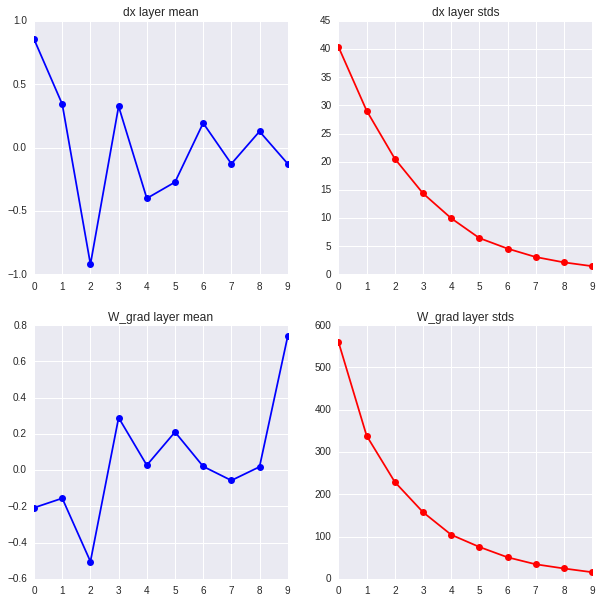

In [11]:
Dx = {}
W_grad = {}
dout = np.ones((1000,500))

for i, H in reversed(list(Hs.items())):
#     W_grad[i] = np.dot(Hs[i].T, dout)
#     dout = np.dot(dout, Ws[i].T)
#     Dx[i] = dout
    X = D if i == 0 else Hs[i-1]
    dact = (1 - np.square(np.tanh(Hs[i]))) * dout
    W_grad[i] = np.dot(dact.T, X) 
    dout = np.dot(dact, Ws[i].T)
    Dx[i] = dout


layer_means_dx = [ np.mean(H) for i,H in reversed(list(Dx.items())) ]
layer_stds_dx  = [ np.std(H) for i,H in reversed(list(Dx.items())) ]

layer_means_W_grad = [ np.mean(H) for i,H in reversed(list(W_grad.items())) ]
layer_stds_W_grad  = [ np.std(H) for i,H in reversed(list(W_grad.items())) ]

for i,W in reversed(list(W_grad.items())):
    print("W_grad layer %d had mean %g and std %g" % (i, np.mean(W), np.std(W)))

for i,dx in reversed(list(Dx.items())):
    print("dx layer %d had mean %g and std %g" % (i, np.mean(dx), np.std(dx)))

plt.figure(figsize=(10,10))

x_points = list(reversed(list(Dx.keys())))
plt.subplot(221)
plt.plot(x_points, layer_means_dx, 'ob-')
plt.title('dx layer mean')

plt.subplot(222)
plt.plot(x_points, layer_stds_dx, 'or-')
plt.title('dx layer stds')

plt.subplot(223)
plt.plot(x_points, layer_means_W_grad, 'ob-')
plt.title('W_grad layer mean')

plt.subplot(224)
plt.plot(x_points, layer_stds_W_grad, 'or-')
plt.title('W_grad layer stds')

W_grad layer 9 had mean -0.010489 and std 9.10017
W_grad layer 8 had mean 0.0103057 and std 13.2874
W_grad layer 7 had mean -0.0134486 and std 19.5198
W_grad layer 6 had mean 0.0274436 and std 28.5478
W_grad layer 5 had mean -0.014669 and std 41.6727
W_grad layer 4 had mean 0.101247 and std 60.2735
W_grad layer 3 had mean -0.198977 and std 89.0546
W_grad layer 2 had mean -0.484401 and std 130.638
W_grad layer 1 had mean -0.320093 and std 196.179
W_grad layer 0 had mean -0.200512 and std 327.267
dx layer 9 had mean -0.00127992 and std 0.842327
dx layer 8 had mean -0.00241917 and std 1.23306
dx layer 7 had mean -0.000535671 and std 1.80466
dx layer 6 had mean -0.00191063 and std 2.63218
dx layer 5 had mean 0.00379637 and std 3.82985
dx layer 4 had mean -0.00290983 and std 5.57421
dx layer 3 had mean -0.0240018 and std 8.14358
dx layer 2 had mean 0.0102898 and std 11.8282
dx layer 1 had mean 0.0652116 and std 16.9373
dx layer 0 had mean -0.0203969 and std 23.1876


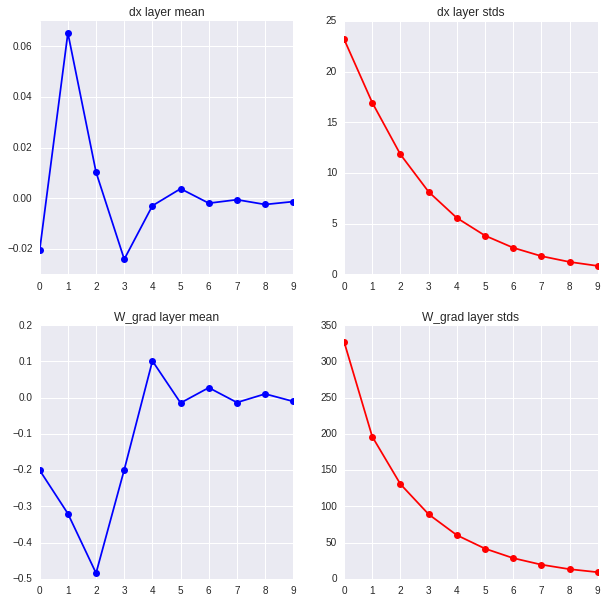

In [12]:
Dx = {}
W_grad = {}
dout = np.random.uniform(low=-1., high=1., size=(1000,500))

for i, H in reversed(list(Hs.items())):
#     W_grad[i] = np.dot(Hs[i].T, dout)
#     dout = np.dot(dout, Ws[i].T)
#     Dx[i] = dout
    X = D if i == 0 else Hs[i-1]
    dact = (1 - np.square(np.tanh(Hs[i]))) * dout
    W_grad[i] = np.dot(dact.T, X) 
    dout = np.dot(dact, Ws[i].T)
    Dx[i] = dout


layer_means_dx = [ np.mean(H) for i,H in reversed(list(Dx.items())) ]
layer_stds_dx  = [ np.std(H) for i,H in reversed(list(Dx.items())) ]

layer_means_W_grad = [ np.mean(H) for i,H in reversed(list(W_grad.items())) ]
layer_stds_W_grad  = [ np.std(H) for i,H in reversed(list(W_grad.items())) ]

for i,W in reversed(list(W_grad.items())):
    print("W_grad layer %d had mean %g and std %g" % (i, np.mean(W), np.std(W)))

for i,dx in reversed(list(Dx.items())):
    print("dx layer %d had mean %g and std %g" % (i, np.mean(dx), np.std(dx)))

plt.figure(figsize=(10,10))

x_points = list(reversed(list(Dx.keys())))
plt.subplot(221)
plt.plot(x_points, layer_means_dx, 'ob-')
plt.title('dx layer mean')

plt.subplot(222)
plt.plot(x_points, layer_stds_dx, 'or-')
plt.title('dx layer stds')

plt.subplot(223)
plt.plot(x_points, layer_means_W_grad, 'ob-')
plt.title('W_grad layer mean')

plt.subplot(224)
plt.plot(x_points, layer_stds_W_grad, 'or-')
plt.title('W_grad layer stds')

## Comments:
So, for this neural network, 1.0 and 0.01 are very unfavourable initialization parameters. Whereas 0.1 might actually have some slightly better properties (from this, it would require probably a learning rate of `1 / (600 * lambda)` for effective gradient descent to work (where $$\lambda\in[200,1000]$$) or where the change in the weights is small compared with the spread of the values). The worse case scenario for the activation being `tanh(x)` is that of the loss being all **1**.

# Xavier Initialization
It was shown that using a fixed form of initialization [Glorot et. al., 2010]. Yields better properties for backpropagation fo gradients. The recommended gradient is given by, $$ 2.0 / \sqrt{\textrm{fan}_{\textrm{in}} + \textrm{fan}_{\textrm{out}}} $$ Lets try this out:

'sigma' for layer 0 = 0.0158114
'sigma' for layer 1 = 0.0158114
'sigma' for layer 2 = 0.0158114
'sigma' for layer 3 = 0.0158114
'sigma' for layer 4 = 0.0158114
'sigma' for layer 5 = 0.0158114
'sigma' for layer 6 = 0.0158114
'sigma' for layer 7 = 0.0158114
'sigma' for layer 8 = 0.0158114
'sigma' for layer 9 = 0.0158114
input layer had mean -0.000588313 and std 1.00104
Hidden layer 0 had mean -0.000403468 and std 0.318526
Hidden layer 1 had mean 0.000161125 and std 0.111524
Hidden layer 2 had mean -4.17684e-05 and std 0.0394611
Hidden layer 3 had mean 6.55606e-06 and std 0.0138767
Hidden layer 4 had mean 1.60354e-06 and std 0.00491388
Hidden layer 5 had mean 1.59977e-08 and std 0.00173424
Hidden layer 6 had mean 3.8121e-07 and std 0.000615731
Hidden layer 7 had mean 1.89929e-07 and std 0.000217801
Hidden layer 8 had mean 1.18362e-08 and std 7.69301e-05
Hidden layer 9 had mean -1.14608e-08 and std 2.72472e-05


/home/gking/.virtualenvs/tensorflow3_build/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


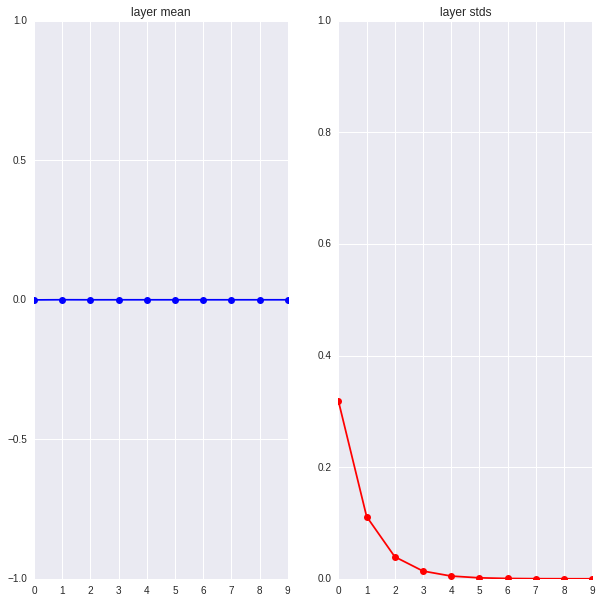

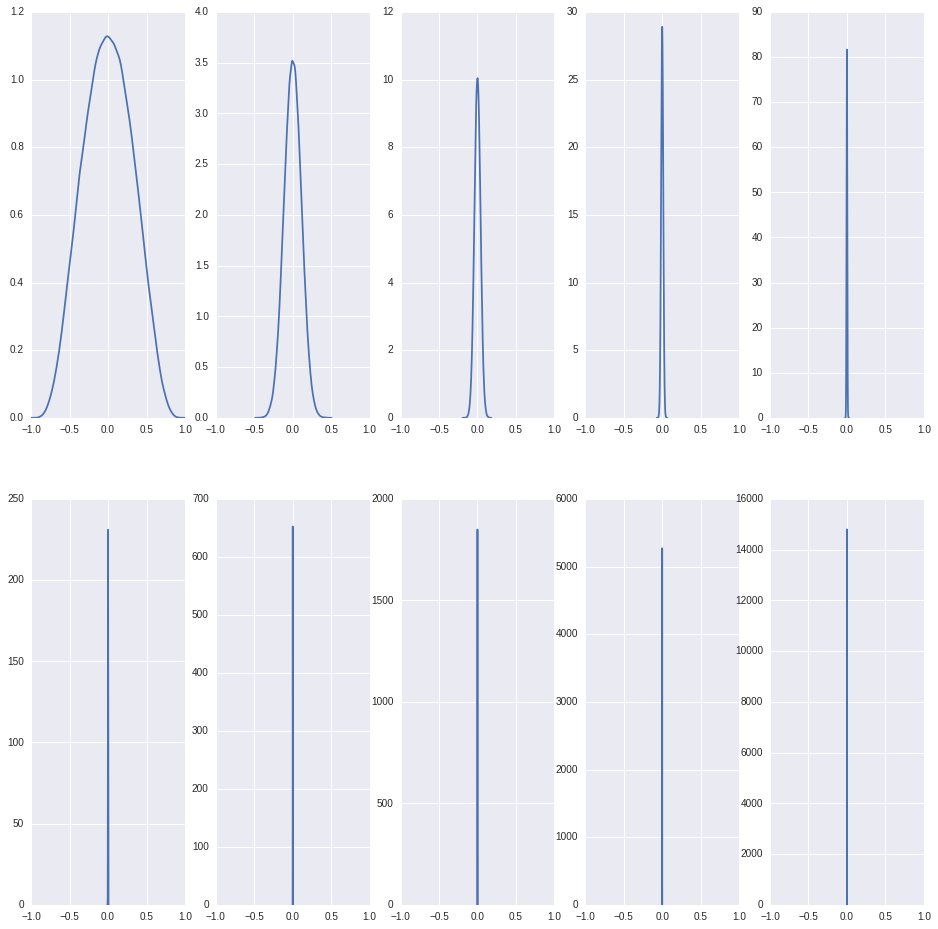

In [13]:
Hs  = {}
Ws  = {}

for idx, x in enumerate(hidden_layer_sizes):
    X = D if idx == 0 else Hs[idx-1]
    # input at this layer comes from the prior layer
    fan_in  = X.shape[1]
    fan_out = hidden_layer_sizes[idx] 
    W = np.random.randn(fan_in, fan_out) / (np.sqrt(fan_in + fan_out) / 0.5)
    print("'sigma' for layer %d = %g" % (idx, 1. / (np.sqrt(fan_in + fan_out) / 0.5 )))
    #Xavier initialization (Glorot et. al., 2010)
    Ws[idx] = W
    
    H = np.dot(X, W)
    H = act[non_linearities[idx]](H)
    #affine transformation and then use the activation function
    #there is no bias :D
    Hs[idx] = H

print("input layer had mean %g and std %g" % (np.mean(D), np.std(D)))
layer_means = [ np.mean(H) for i,H in Hs.items() ]
layer_stds  = [ np.std(H) for i,H in Hs.items() ]

for i,H in Hs.items():
    print("Hidden layer %d had mean %g and std %g" % (i, np.mean(H), np.std(H)))

#plot the means and standard deviations
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-')
ax1 = plt.subplot(121)
ax1.set_ylim([-1.,1.0])
plt.title('layer mean')

plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'or-')
ax1 = plt.subplot(122)
ax1.set_ylim([0.0,1.0])
plt.title('layer stds')

plt.figure(figsize=(16,16))
for i,H in Hs.items():
    plt.subplot( 2, len(Hs) // 2, i+1)
    sns.kdeplot(data=H.ravel())
    ax = plt.subplot( 2, len(Hs) // 2, i+1)
    ax.set_xlim([-1.0,1.0])


W_grad layer 9 had mean 1.18362e-05 and std 0.0022368
W_grad layer 8 had mean -1.17869e-06 and std 0.0023165
W_grad layer 7 had mean 1.36812e-06 and std 0.00236558
W_grad layer 6 had mean 3.8333e-08 and std 0.00215718
W_grad layer 5 had mean 3.2981e-07 and std 0.00214497
W_grad layer 4 had mean 6.79055e-07 and std 0.00200765
W_grad layer 3 had mean -3.93749e-07 and std 0.00198612
W_grad layer 2 had mean -1.19181e-05 and std 0.00207914
W_grad layer 1 had mean -1.96454e-06 and std 0.00213827
W_grad layer 0 had mean 1.29028e-07 and std 0.00211575
dx layer 9 had mean -0.00620596 and std 0.348429
dx layer 8 had mean 0.00358889 and std 0.121707
dx layer 7 had mean 0.00239618 and std 0.0418359
dx layer 6 had mean 0.000205656 and std 0.0150053
dx layer 5 had mean 0.000103541 and std 0.00517288
dx layer 4 had mean 9.39869e-06 and std 0.00178223
dx layer 3 had mean -7.40107e-05 and std 0.000643192
dx layer 2 had mean 5.07484e-06 and std 0.000221877
dx layer 1 had mean -1.43841e-06 and std 7.2378

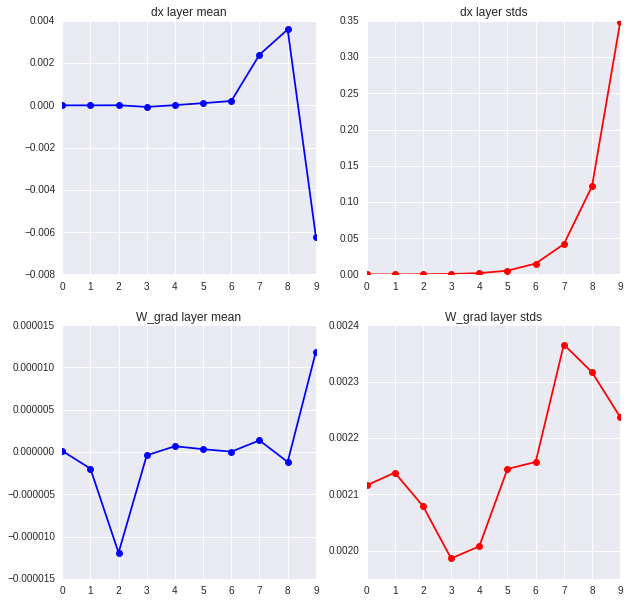

In [14]:
Dx = {}
W_grad = {}
dout = np.ones((1000,500))

for i, H in reversed(list(Hs.items())):
#     W_grad[i] = np.dot(Hs[i].T, dout)
#     dout = np.dot(dout, Ws[i].T)
#     Dx[i] = dout
    X = D if i == 0 else Hs[i-1]
    dact = (1 - np.square(np.tanh(Hs[i]))) * dout
    W_grad[i] = np.dot(dact.T, X) 
    dout = np.dot(dact, Ws[i].T)
    Dx[i] = dout


layer_means_dx = [ np.mean(H) for i,H in reversed(list(Dx.items())) ]
layer_stds_dx  = [ np.std(H) for i,H in reversed(list(Dx.items())) ]

layer_means_W_grad = [ np.mean(H) for i,H in reversed(list(W_grad.items())) ]
layer_stds_W_grad  = [ np.std(H) for i,H in reversed(list(W_grad.items())) ]

for i,W in reversed(list(W_grad.items())):
    print("W_grad layer %d had mean %g and std %g" % (i, np.mean(W), np.std(W)))

for i,dx in reversed(list(Dx.items())):
    print("dx layer %d had mean %g and std %g" % (i, np.mean(dx), np.std(dx)))

plt.figure(figsize=(10,10))

x_points = list(reversed(list(Dx.keys())))
plt.subplot(221)
plt.plot(x_points, layer_means_dx, 'ob-')
plt.title('dx layer mean')

plt.subplot(222)
plt.plot(x_points, layer_stds_dx, 'or-')
plt.title('dx layer stds')

plt.subplot(223)
plt.plot(x_points, layer_means_W_grad, 'ob-')
plt.title('W_grad layer mean')

plt.subplot(224)
plt.plot(x_points, layer_stds_W_grad, 'or-')
plt.title('W_grad layer stds')

W_grad layer 9 had mean -3.35601e-06 and std 0.00140936
W_grad layer 8 had mean -2.10106e-06 and std 0.00140367
W_grad layer 7 had mean -7.03241e-06 and std 0.0014023
W_grad layer 6 had mean -1.77445e-07 and std 0.00139972
W_grad layer 5 had mean 1.15647e-06 and std 0.00141216
W_grad layer 4 had mean 3.55719e-06 and std 0.0014195
W_grad layer 3 had mean 1.45085e-06 and std 0.00143069
W_grad layer 2 had mean 1.66858e-06 and std 0.00141815
W_grad layer 1 had mean 3.22832e-06 and std 0.00140742
W_grad layer 0 had mean -1.59878e-06 and std 0.00142458
dx layer 9 had mean -0.000108455 and std 0.204372
dx layer 8 had mean -0.000100309 and std 0.0721798
dx layer 7 had mean 5.60838e-05 and std 0.02555
dx layer 6 had mean -1.21197e-05 and std 0.00903946
dx layer 5 had mean 1.90923e-06 and std 0.0032079
dx layer 4 had mean -7.40287e-07 and std 0.00113702
dx layer 3 had mean -5.61081e-08 and std 0.000402032
dx layer 2 had mean -4.4653e-08 and std 0.000141775
dx layer 1 had mean -7.47634e-09 and st

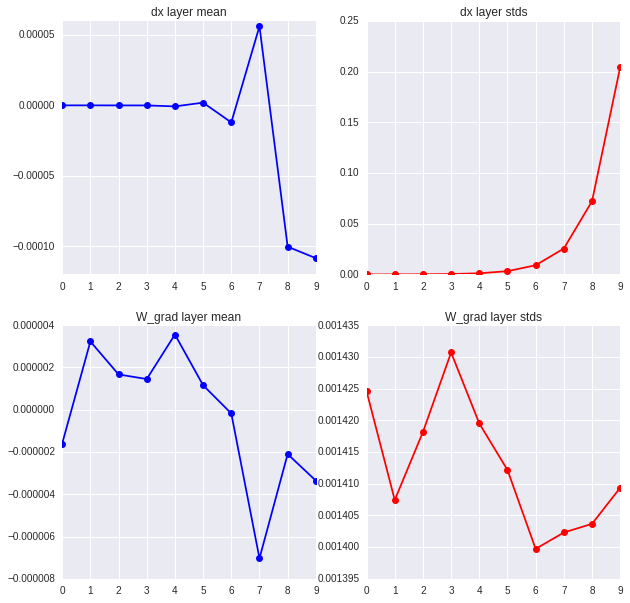

In [15]:
Dx = {}
W_grad = {}
dout = np.random.uniform(low=-1.0, high=1.0, size=(1000,500))

for i, H in reversed(list(Hs.items())):
#     W_grad[i] = np.dot(Hs[i].T, dout)
#     dout = np.dot(dout, Ws[i].T)
#     Dx[i] = dout
    X = D if i == 0 else Hs[i-1]
    dact = (1 - np.square(np.tanh(Hs[i]))) * dout
    W_grad[i] = np.dot(dact.T, X) 
    dout = np.dot(dact, Ws[i].T)
    Dx[i] = dout


layer_means_dx = [ np.mean(H) for i,H in reversed(list(Dx.items())) ]
layer_stds_dx  = [ np.std(H) for i,H in reversed(list(Dx.items())) ]

layer_means_W_grad = [ np.mean(H) for i,H in reversed(list(W_grad.items())) ]
layer_stds_W_grad  = [ np.std(H) for i,H in reversed(list(W_grad.items())) ]

for i,W in reversed(list(W_grad.items())):
    print("W_grad layer %d had mean %g and std %g" % (i, np.mean(W), np.std(W)))

for i,dx in reversed(list(Dx.items())):
    print("dx layer %d had mean %g and std %g" % (i, np.mean(dx), np.std(dx)))

plt.figure(figsize=(10,10))

x_points = list(reversed(list(Dx.keys())))
plt.subplot(221)
plt.plot(x_points, layer_means_dx, 'ob-')
plt.title('dx layer mean')

plt.subplot(222)
plt.plot(x_points, layer_stds_dx, 'or-')
plt.title('dx layer stds')

plt.subplot(223)
plt.plot(x_points, layer_means_W_grad, 'ob-')
plt.title('W_grad layer mean')

plt.subplot(224)
plt.plot(x_points, layer_stds_W_grad, 'or-')
plt.title('W_grad layer stds')

# Xavier Initialization Advantages
So, the size of the gradient decreases at the lower layers - allowing for a larger learning rate (**GOOD**). The shift in the weights is small compared to the initialization spread (**BETTER**). Interesting question how large is the **goldilocks zone**.

In [16]:
# Dx = {}
# W_grad = {}
# dout = np.ones((1000,500))

# for i, H in reversed(list(Hs.items())):
#     W_grad[i] = np.dot(Hs[i].T, dout)
#     dout = np.dot(dout, Ws[i].T)
#     Dx[i] = dout

# layer_means_dx = [ np.mean(H) for i,H in reversed(list(Dx.items())) ]
# layer_stds_dx  = [ np.std(H) for i,H in reversed(list(Dx.items())) ]

# layer_means_W_grad = [ np.mean(H) for i,H in reversed(list(W_grad.items())) ]
# layer_stds_W_grad  = [ np.std(H) for i,H in reversed(list(W_grad.items())) ]

# for i,W in reversed(list(W_grad.items())):
#     print("W_grad layer %d had mean %g and std %g" % (i, np.mean(W), np.std(W)))

# for i,dx in reversed(list(Dx.items())):
#     print("dx layer %d had mean %g and std %g" % (i, np.mean(dx), np.std(dx)))

# plt.figure(figsize=(10,10))

# x_points = list(reversed(list(Dx.keys())))
# plt.subplot(221)
# plt.plot(x_points, layer_means_dx, 'ob-')
# plt.title('dx layer mean')

# plt.subplot(222)
# plt.plot(x_points, layer_stds_dx, 'or-')
# plt.title('dx layer stds')

# plt.subplot(223)
# plt.plot(x_points, layer_means_W_grad, 'ob-')
# plt.title('W_grad layer mean')

# plt.subplot(224)
# plt.plot(x_points, layer_stds_W_grad, 'or-')
# plt.title('W_grad layer stds')

# ReLU activation

What about a different activation function (suppose we try a rectified linear activation, `ReLU(x)`). Starting with the same initialization (0.01).

input layer had mean -0.000588313 and std 1.00104
Hidden layer 0 had mean 0.0892923 and std 0.130727
Hidden layer 1 had mean 0.0146239 and std 0.0209981
Hidden layer 2 had mean 0.00227345 and std 0.00333614
Hidden layer 3 had mean 0.000347832 and std 0.000505373
Hidden layer 4 had mean 5.55698e-05 and std 7.929e-05
Hidden layer 5 had mean 8.17029e-06 and std 1.20131e-05
Hidden layer 6 had mean 1.30769e-06 and std 1.9221e-06
Hidden layer 7 had mean 2.14358e-07 and std 3.11757e-07
Hidden layer 8 had mean 3.17827e-08 and std 4.9647e-08
Hidden layer 9 had mean 4.91216e-09 and std 7.56962e-09


/home/gking/.virtualenvs/tensorflow3_build/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


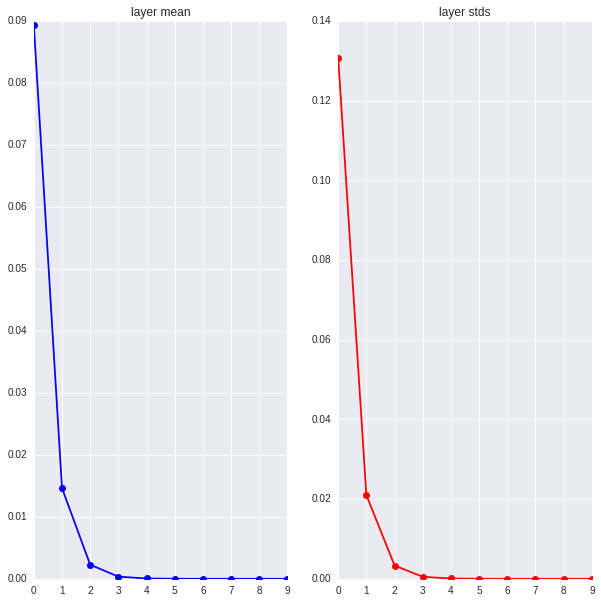

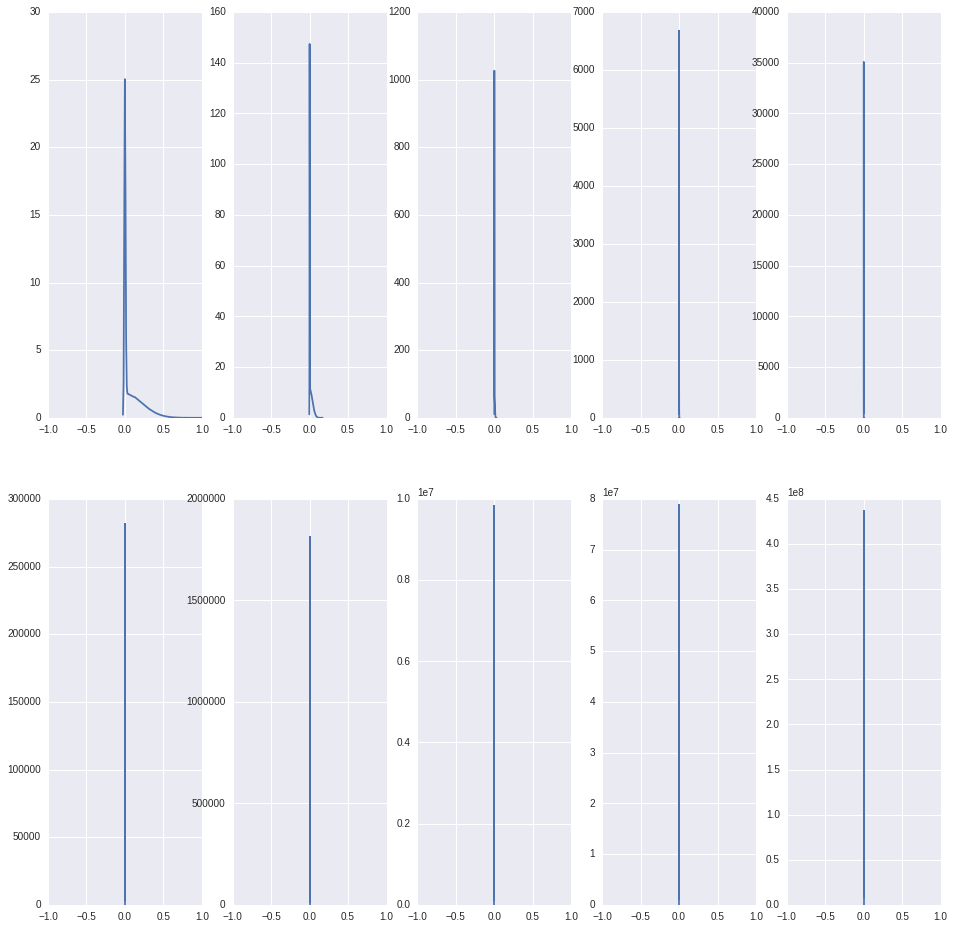

In [17]:
Hs  = {}
Ws  = {}
Zs  = {}

for idx, x in enumerate(hidden_layer_sizes):
    X = D if idx == 0 else Hs[idx-1]
    # input at this layer comes from the prior layer
    fan_in  = X.shape[1]
    fan_out = hidden_layer_sizes[idx] 
    W = np.random.randn(fan_in, fan_out) * 0.01
    Ws[idx] = W
    
    H = np.dot(X, W)
    Zs[idx] = H.copy()
    H = act['relu'](H)
    #affine transformation and then use the activation function
    #there is no bias :D
    Hs[idx] = H

print("input layer had mean %g and std %g" % (np.mean(D), np.std(D)))
layer_means = [ np.mean(H) for i,H in Hs.items() ]
layer_stds  = [ np.std(H) for i,H in Hs.items() ]

for i,H in Hs.items():
    print("Hidden layer %d had mean %g and std %g" % (i, np.mean(H), np.std(H)))

#plot the means and standard deviations
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-')
#ax1 = plt.subplot(121)
#ax1.set_ylim([-0.002,0.002])
plt.title('layer mean')

plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'or-')
plt.title('layer stds')

plt.figure(figsize=(16,16))
for i,H in Hs.items():
    plt.subplot( 2, len(Hs) // 2, i+1)
    sns.kdeplot(data=H.ravel())
    ax = plt.subplot( 2, len(Hs) // 2, i+1)
    ax.set_xlim([-1.0,1.0])

## Problems?
See that the spread of values is very small for layers after layer 2. Let's investigate the gradient.

W_grad layer 9 had mean 1.50965e-05 and std 3.03744e-05
W_grad layer 8 had mean 8.38463e-06 and std 3.88935e-05
W_grad layer 7 had mean 1.03404e-05 and std 4.18999e-05
W_grad layer 6 had mean 1.03528e-05 and std 4.39162e-05
W_grad layer 5 had mean 1.02141e-05 and std 4.4978e-05
W_grad layer 4 had mean 1.06649e-05 and std 4.40923e-05
W_grad layer 3 had mean 1.06678e-05 and std 4.14332e-05
W_grad layer 2 had mean 9.45329e-06 and std 3.34421e-05
W_grad layer 1 had mean 9.36271e-06 and std 2.16967e-05
W_grad layer 0 had mean -1.30858e-08 and std 3.85777e-06
dx layer 9 had mean 0.47497 and std 0.499373
dx layer 8 had mean 0.0391359 and std 0.129014
dx layer 7 had mean 0.00790911 and std 0.0244548
dx layer 6 had mean 0.0012682 and std 0.00454787
dx layer 5 had mean 0.000183779 and std 0.00078683
dx layer 4 had mean 3.06771e-05 and std 0.000136648
dx layer 3 had mean 4.69311e-06 and std 2.30261e-05
dx layer 2 had mean 6.46279e-07 and std 3.82762e-06
dx layer 1 had mean 1.04821e-07 and std 6.3

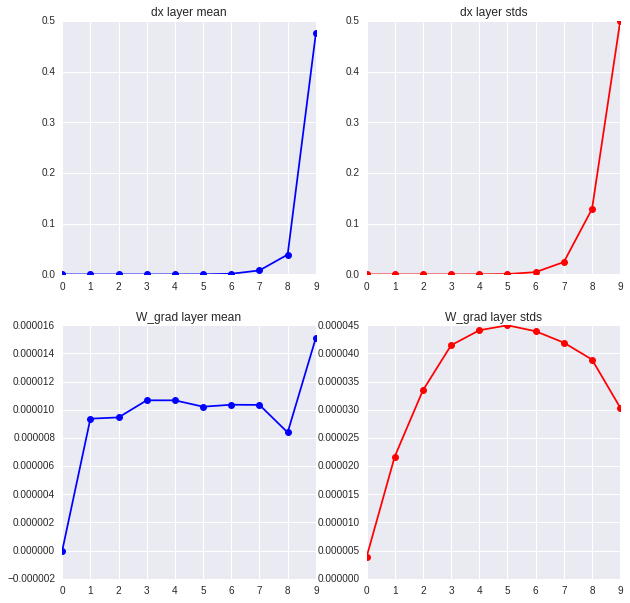

In [18]:
Dx = {}
W_grad = {}
dout = np.ones((1000,500))

for i, H in reversed(list(Hs.items())):
#     W_grad[i] = np.dot(Hs[i].T, dout)
#     dout = np.dot(dout, Ws[i].T)
#     Dx[i] = dout
    X = D if i == 0 else Hs[i-1]
    dact = np.array(dout, copy=True)
    dact[Zs[i] < 0] = 0
    W_grad[i] = np.dot(dact.T, X) 
    dout = np.dot(dact, Ws[i].T)
    Dx[i] = dact


layer_means_dx = [ np.mean(H) for i,H in reversed(list(Dx.items())) ]
layer_stds_dx  = [ np.std(H) for i,H in reversed(list(Dx.items())) ]

layer_means_W_grad = [ np.mean(H) for i,H in reversed(list(W_grad.items())) ]
layer_stds_W_grad  = [ np.std(H) for i,H in reversed(list(W_grad.items())) ]

for i,W in reversed(list(W_grad.items())):
    print("W_grad layer %d had mean %g and std %g" % (i, np.mean(W), np.std(W)))

for i,dx in reversed(list(Dx.items())):
    print("dx layer %d had mean %g and std %g" % (i, np.mean(dx), np.std(dx)))

plt.figure(figsize=(10,10))

x_points = list(reversed(list(Dx.keys())))
plt.subplot(221)
plt.plot(x_points, layer_means_dx, 'ob-')
plt.title('dx layer mean')

plt.subplot(222)
plt.plot(x_points, layer_stds_dx, 'or-')
plt.title('dx layer stds')

plt.subplot(223)
plt.plot(x_points, layer_means_W_grad, 'ob-')
plt.title('W_grad layer mean')

plt.subplot(224)
plt.plot(x_points, layer_stds_W_grad, 'or-')
plt.title('W_grad layer stds')

W_grad layer 9 had mean -2.02482e-08 and std 8.19199e-07
W_grad layer 8 had mean -4.87754e-09 and std 7.70659e-07
W_grad layer 7 had mean -2.29236e-08 and std 7.04368e-07
W_grad layer 6 had mean -1.04665e-09 and std 7.28896e-07
W_grad layer 5 had mean -2.56157e-08 and std 7.70947e-07
W_grad layer 4 had mean -2.88353e-08 and std 7.97609e-07
W_grad layer 3 had mean -2.43355e-08 and std 7.97364e-07
W_grad layer 2 had mean -1.76342e-08 and std 7.86728e-07
W_grad layer 1 had mean -2.79513e-08 and std 7.8176e-07
W_grad layer 0 had mean -1.17897e-09 and std 7.80654e-07
dx layer 9 had mean -0.000585264 and std 0.398442
dx layer 8 had mean -1.31224e-05 and std 0.0609935
dx layer 7 had mean -1.56943e-05 and std 0.00976825
dx layer 6 had mean 1.07566e-07 and std 0.0015546
dx layer 5 had mean -4.58735e-07 and std 0.000245639
dx layer 4 had mean -8.20334e-08 and std 3.92384e-05
dx layer 3 had mean -1.10645e-08 and std 6.21628e-06
dx layer 2 had mean -1.32964e-09 and std 9.77926e-07
dx layer 1 had m

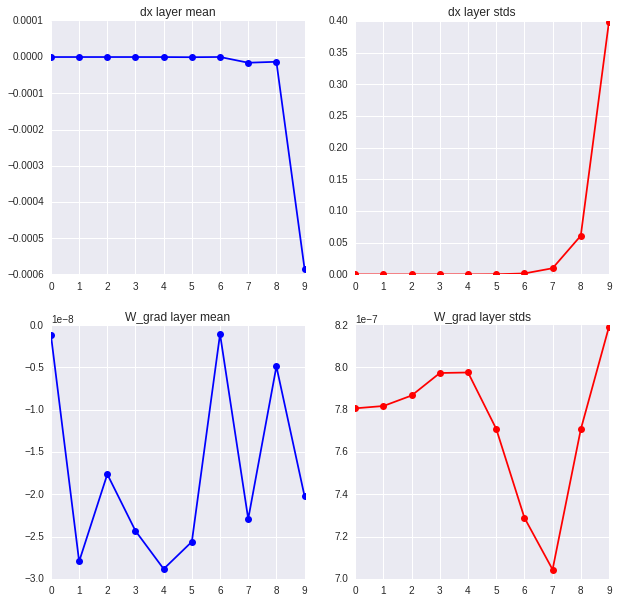

In [19]:
Dx = {}
W_grad = {}
dout = np.random.uniform(low=-1.0, high=1.0, size=(1000,500))

for i, H in reversed(list(Hs.items())):
#     W_grad[i] = np.dot(Hs[i].T, dout)
#     dout = np.dot(dout, Ws[i].T)
#     Dx[i] = dout
    X = D if i == 0 else Hs[i-1]
    dact = np.array(dout, copy=True)
    dact[Zs[i] < 0] = 0
    W_grad[i] = np.dot(dact.T, X) 
    dout = np.dot(dact, Ws[i].T)
    Dx[i] = dact


layer_means_dx = [ np.mean(H) for i,H in reversed(list(Dx.items())) ]
layer_stds_dx  = [ np.std(H) for i,H in reversed(list(Dx.items())) ]

layer_means_W_grad = [ np.mean(H) for i,H in reversed(list(W_grad.items())) ]
layer_stds_W_grad  = [ np.std(H) for i,H in reversed(list(W_grad.items())) ]

for i,W in reversed(list(W_grad.items())):
    print("W_grad layer %d had mean %g and std %g" % (i, np.mean(W), np.std(W)))

for i,dx in reversed(list(Dx.items())):
    print("dx layer %d had mean %g and std %g" % (i, np.mean(dx), np.std(dx)))

plt.figure(figsize=(10,10))

x_points = list(reversed(list(Dx.keys())))
plt.subplot(221)
plt.plot(x_points, layer_means_dx, 'ob-')
plt.title('dx layer mean')

plt.subplot(222)
plt.plot(x_points, layer_stds_dx, 'or-')
plt.title('dx layer stds')

plt.subplot(223)
plt.plot(x_points, layer_means_W_grad, 'ob-')
plt.title('W_grad layer mean')

plt.subplot(224)
plt.plot(x_points, layer_stds_W_grad, 'or-')
plt.title('W_grad layer stds')

## Results
The gradients for all layers are small compared to initialization spread (**GOOD**). Parameter might be too small. 

What about 0.1?

input layer had mean -0.000588313 and std 1.00104
Hidden layer 0 had mean 0.890636 and std 1.30312
Hidden layer 1 had mean 1.40998 and std 2.07432
Hidden layer 2 had mean 2.26679 and std 3.32999
Hidden layer 3 had mean 3.57877 and std 5.15046
Hidden layer 4 had mean 5.62001 and std 8.32578
Hidden layer 5 had mean 9.46753 and std 13.3584
Hidden layer 6 had mean 13.877 and std 21.9246
Hidden layer 7 had mean 24.5501 and std 33.9615
Hidden layer 8 had mean 39.7593 and std 58.199
Hidden layer 9 had mean 63.3256 and std 92.8714


/home/gking/.virtualenvs/tensorflow3_build/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


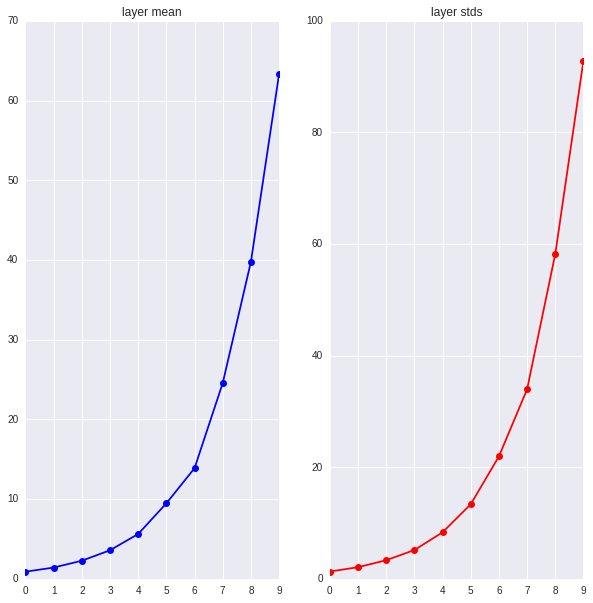

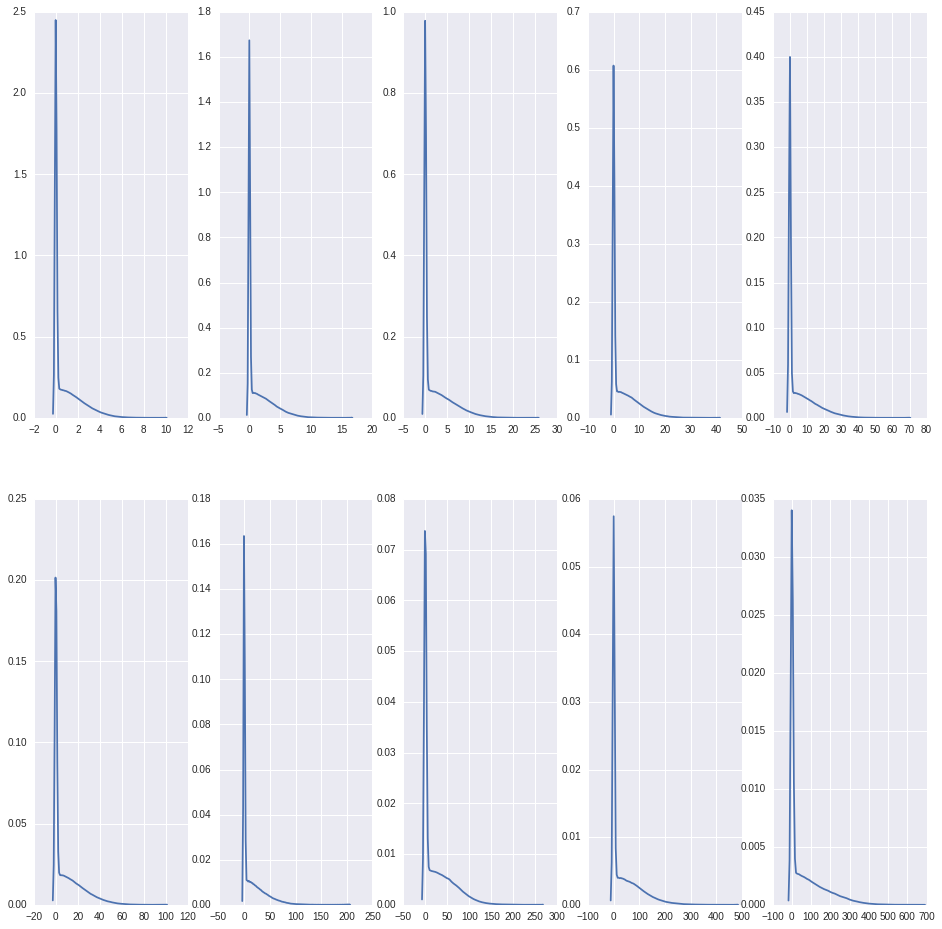

In [20]:
Hs  = {}
Ws  = {}
Zs  = {}

for idx, x in enumerate(hidden_layer_sizes):
    X = D if idx == 0 else Hs[idx-1]
    # input at this layer comes from the prior layer
    fan_in  = X.shape[1]
    fan_out = hidden_layer_sizes[idx] 
    W = np.random.randn(fan_in, fan_out) * 0.1
    Ws[idx] = W
    
    H = np.dot(X, W)
    Zs[idx] = H.copy()
    H = act['relu'](H)
    #affine transformation and then use the activation function
    #there is no bias :D
    Hs[idx] = H

print("input layer had mean %g and std %g" % (np.mean(D), np.std(D)))
layer_means = [ np.mean(H) for i,H in Hs.items() ]
layer_stds  = [ np.std(H) for i,H in Hs.items() ]

for i,H in Hs.items():
    print("Hidden layer %d had mean %g and std %g" % (i, np.mean(H), np.std(H)))

#plot the means and standard deviations
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-')
#ax1 = plt.subplot(121)
#ax1.set_ylim([-0.002,0.002])
plt.title('layer mean')

plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'or-')
plt.title('layer stds')

plt.figure(figsize=(16,16))
for i,H in Hs.items():
    plt.subplot( 2, len(Hs) // 2, i+1)
    sns.kdeplot(data=H.ravel())
    ax = plt.subplot( 2, len(Hs) // 2, i+1)

W_grad layer 9 had mean -34.8449 and std 915.05
W_grad layer 8 had mean -7.33333 and std 874.864
W_grad layer 7 had mean -20.2034 and std 889.726
W_grad layer 6 had mean -47.698 and std 838.007
W_grad layer 5 had mean -15.775 and std 820.601
W_grad layer 4 had mean -25.1267 and std 788.784
W_grad layer 3 had mean -45.5419 and std 815.512
W_grad layer 2 had mean -37.9569 and std 823.882
W_grad layer 1 had mean -46.993 and std 796.553
W_grad layer 0 had mean -1.13939 and std 814.812
dx layer 9 had mean -0.000732691 and std 0.411375
dx layer 8 had mean -0.000141777 and std 0.650428
dx layer 7 had mean -0.00115568 and std 1.05455
dx layer 6 had mean -0.00465454 and std 1.61226
dx layer 5 had mean -0.00229465 and std 2.62787
dx layer 4 had mean -0.00581028 and std 4.1428
dx layer 3 had mean -0.018843 and std 6.58588
dx layer 2 had mean -0.0255657 and std 10.3216
dx layer 1 had mean -0.0508216 and std 16.2564
dx layer 0 had mean -0.0402567 and std 25.7204


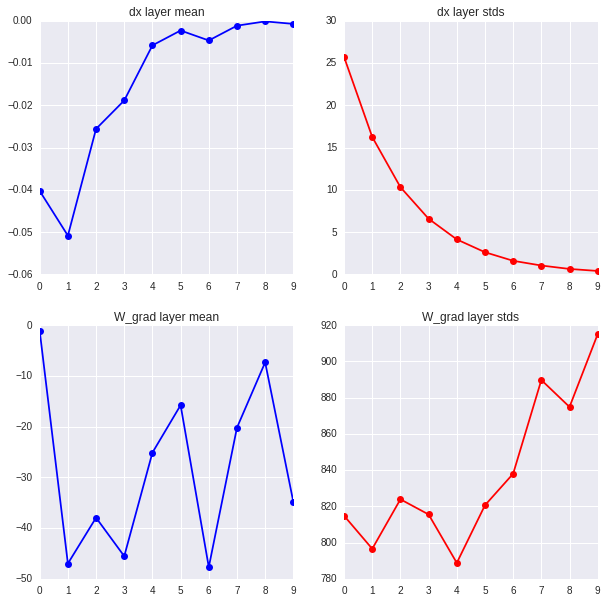

In [21]:
Dx = {}
W_grad = {}
dout = np.random.uniform(low=-1.0, high=1.0, size=(1000,500))

for i, H in reversed(list(Hs.items())):
#     W_grad[i] = np.dot(Hs[i].T, dout)
#     dout = np.dot(dout, Ws[i].T)
#     Dx[i] = dout
    X = D if i == 0 else Hs[i-1]
    dact = np.array(dout, copy=True)
    dact[Zs[i] < 0] = 0
    W_grad[i] = np.dot(dact.T, X) 
    dout = np.dot(dact, Ws[i].T)
    Dx[i] = dact


layer_means_dx = [ np.mean(H) for i,H in reversed(list(Dx.items())) ]
layer_stds_dx  = [ np.std(H) for i,H in reversed(list(Dx.items())) ]

layer_means_W_grad = [ np.mean(H) for i,H in reversed(list(W_grad.items())) ]
layer_stds_W_grad  = [ np.std(H) for i,H in reversed(list(W_grad.items())) ]

for i,W in reversed(list(W_grad.items())):
    print("W_grad layer %d had mean %g and std %g" % (i, np.mean(W), np.std(W)))

for i,dx in reversed(list(Dx.items())):
    print("dx layer %d had mean %g and std %g" % (i, np.mean(dx), np.std(dx)))

plt.figure(figsize=(10,10))

x_points = list(reversed(list(Dx.keys())))
plt.subplot(221)
plt.plot(x_points, layer_means_dx, 'ob-')
plt.title('dx layer mean')

plt.subplot(222)
plt.plot(x_points, layer_stds_dx, 'or-')
plt.title('dx layer stds')

plt.subplot(223)
plt.plot(x_points, layer_means_W_grad, 'ob-')
plt.title('W_grad layer mean')

plt.subplot(224)
plt.plot(x_points, layer_stds_W_grad, 'or-')
plt.title('W_grad layer stds')

input layer had mean -0.000588313 and std 1.00104
Hidden layer 0 had mean 8.94894 and std 13.1027
Hidden layer 1 had mean 151.726 and std 214.587
Hidden layer 2 had mean 2350.93 and std 3428.74
Hidden layer 3 had mean 38223.3 and std 55467.4
Hidden layer 4 had mean 607995 and std 895940
Hidden layer 5 had mean 9.90149e+06 and std 1.42067e+07
Hidden layer 6 had mean 1.57277e+08 and std 2.28563e+08
Hidden layer 7 had mean 2.27267e+09 and std 3.44831e+09
Hidden layer 8 had mean 3.61296e+10 and std 5.40322e+10
Hidden layer 9 had mean 5.98907e+11 and std 8.67198e+11


/home/gking/.virtualenvs/tensorflow3_build/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


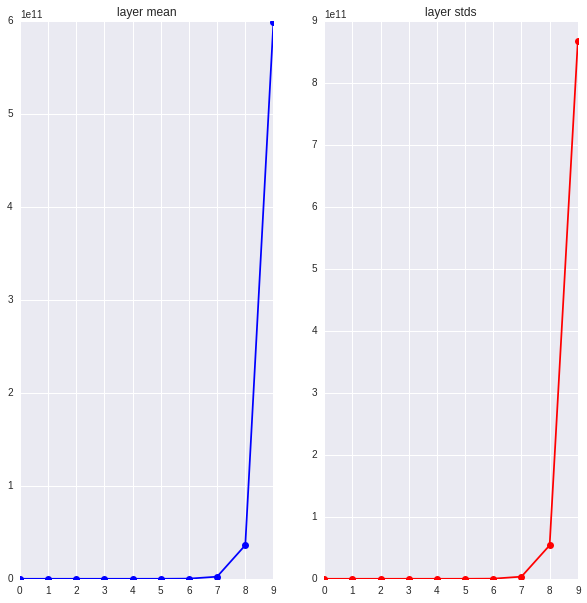

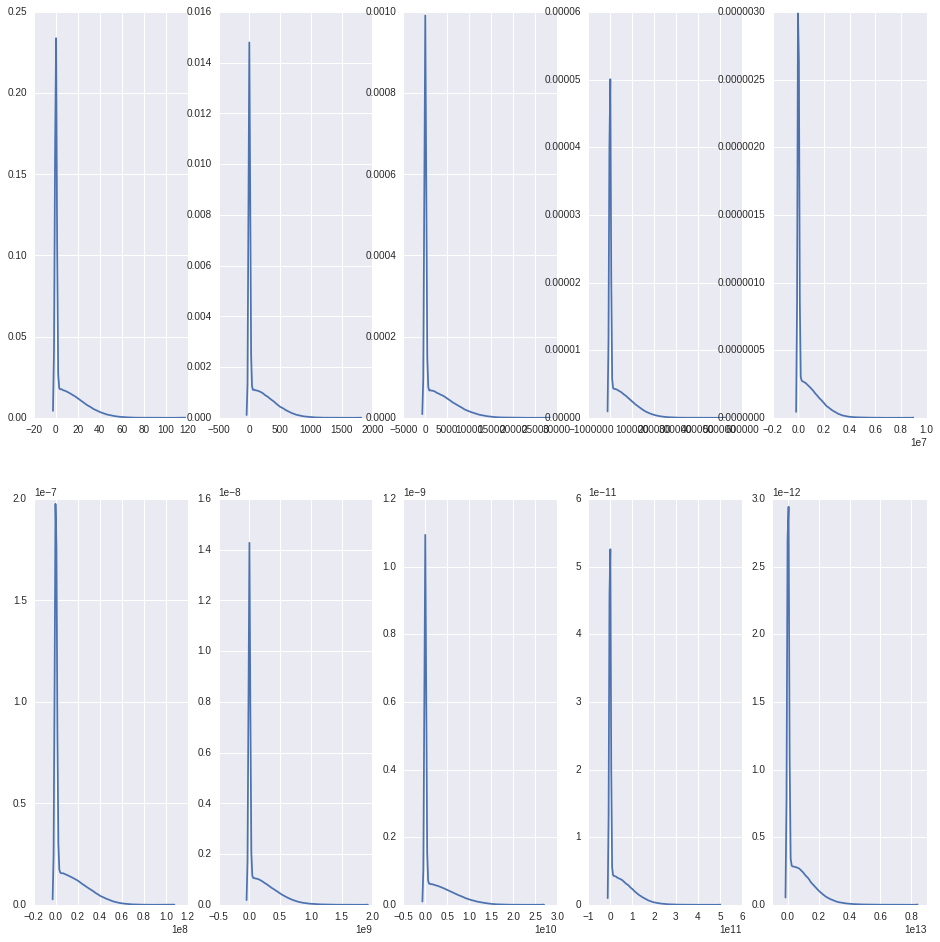

In [22]:
Hs  = {}
Ws  = {}
Zs  = {}

for idx, x in enumerate(hidden_layer_sizes):
    X = D if idx == 0 else Hs[idx-1]
    # input at this layer comes from the prior layer
    fan_in  = X.shape[1]
    fan_out = hidden_layer_sizes[idx] 
    W = np.random.randn(fan_in, fan_out) * 1.0
    Ws[idx] = W
    
    H = np.dot(X, W)
    Zs[idx] = H.copy()
    H = act['relu'](H)
    #affine transformation and then use the activation function
    #there is no bias :D
    Hs[idx] = H

print("input layer had mean %g and std %g" % (np.mean(D), np.std(D)))
layer_means = [ np.mean(H) for i,H in Hs.items() ]
layer_stds  = [ np.std(H) for i,H in Hs.items() ]

for i,H in Hs.items():
    print("Hidden layer %d had mean %g and std %g" % (i, np.mean(H), np.std(H)))

#plot the means and standard deviations
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-')
#ax1 = plt.subplot(121)
#ax1.set_ylim([-0.002,0.002])
plt.title('layer mean')

plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'or-')
plt.title('layer stds')

plt.figure(figsize=(16,16))
for i,H in Hs.items():
    plt.subplot( 2, len(Hs) // 2, i+1)
    sns.kdeplot(data=H.ravel())
    ax = plt.subplot( 2, len(Hs) // 2, i+1)

W_grad layer 9 had mean 7.32481e+09 and std 8.45187e+11
W_grad layer 8 had mean -1.29072e+10 and std 7.93396e+11
W_grad layer 7 had mean 2.42155e+10 and std 8.0091e+11
W_grad layer 6 had mean 3.52198e+09 and std 8.15195e+11
W_grad layer 5 had mean 1.01951e+10 and std 8.14881e+11
W_grad layer 4 had mean 3.22404e+10 and std 8.63179e+11
W_grad layer 3 had mean -4.89549e+08 and std 8.3558e+11
W_grad layer 2 had mean 2.1621e+10 and std 8.46291e+11
W_grad layer 1 had mean 2.32994e+10 and std 8.24498e+11
W_grad layer 0 had mean -3.1876e+09 and std 8.32025e+11
dx layer 9 had mean 0.000204347 and std 0.417374
dx layer 8 had mean -0.00543163 and std 6.5683
dx layer 7 had mean 0.163858 and std 100.69
dx layer 6 had mean 0.294467 and std 1603.66
dx layer 5 had mean 16.1268 and std 25442.1
dx layer 4 had mean 836.975 and std 406986
dx layer 3 had mean 471.533 and std 6.47777e+06
dx layer 2 had mean 130613 and std 1.02881e+08
dx layer 1 had mean 2.5782e+06 and std 1.66327e+09
dx layer 0 had mean 1.5

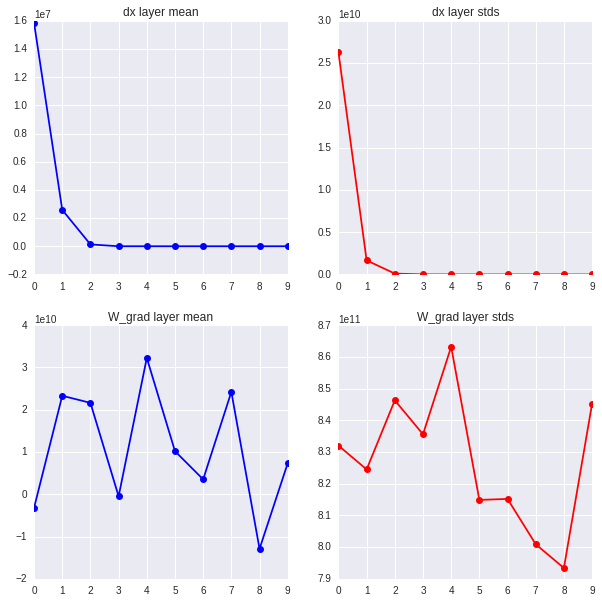

In [23]:
Dx = {}
W_grad = {}
dout = np.random.uniform(low=-1.0, high=1.0, size=(1000,500))

for i, H in reversed(list(Hs.items())):
#     W_grad[i] = np.dot(Hs[i].T, dout)
#     dout = np.dot(dout, Ws[i].T)
#     Dx[i] = dout
    X = D if i == 0 else Hs[i-1]
    dact = np.array(dout, copy=True)
    dact[Zs[i] < 0] = 0
    W_grad[i] = np.dot(dact.T, X) 
    dout = np.dot(dact, Ws[i].T)
    Dx[i] = dact


layer_means_dx = [ np.mean(H) for i,H in reversed(list(Dx.items())) ]
layer_stds_dx  = [ np.std(H) for i,H in reversed(list(Dx.items())) ]

layer_means_W_grad = [ np.mean(H) for i,H in reversed(list(W_grad.items())) ]
layer_stds_W_grad  = [ np.std(H) for i,H in reversed(list(W_grad.items())) ]

for i,W in reversed(list(W_grad.items())):
    print("W_grad layer %d had mean %g and std %g" % (i, np.mean(W), np.std(W)))

for i,dx in reversed(list(Dx.items())):
    print("dx layer %d had mean %g and std %g" % (i, np.mean(dx), np.std(dx)))

plt.figure(figsize=(10,10))

x_points = list(reversed(list(Dx.keys())))
plt.subplot(221)
plt.plot(x_points, layer_means_dx, 'ob-')
plt.title('dx layer mean')

plt.subplot(222)
plt.plot(x_points, layer_stds_dx, 'or-')
plt.title('dx layer stds')

plt.subplot(223)
plt.plot(x_points, layer_means_W_grad, 'ob-')
plt.title('W_grad layer mean')

plt.subplot(224)
plt.plot(x_points, layer_stds_W_grad, 'or-')
plt.title('W_grad layer stds')

## 1.0 is bad (7E11)

input layer had mean -0.000588313 and std 1.00104
Hidden layer 0 had mean 0.565144 and std 0.82738
Hidden layer 1 had mean 0.577207 and std 0.841838
Hidden layer 2 had mean 0.572195 and std 0.847707
Hidden layer 3 had mean 0.600146 and std 0.871148
Hidden layer 4 had mean 0.609048 and std 0.880491
Hidden layer 5 had mean 0.618049 and std 0.917755
Hidden layer 6 had mean 0.661764 and std 0.970246
Hidden layer 7 had mean 0.642057 and std 1.00142
Hidden layer 8 had mean 0.664362 and std 0.957565
Hidden layer 9 had mean 0.584604 and std 0.921831


/home/gking/.virtualenvs/tensorflow3_build/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


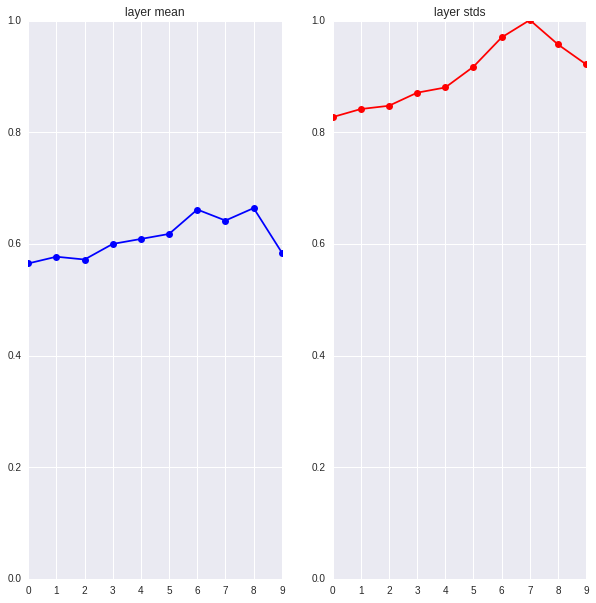

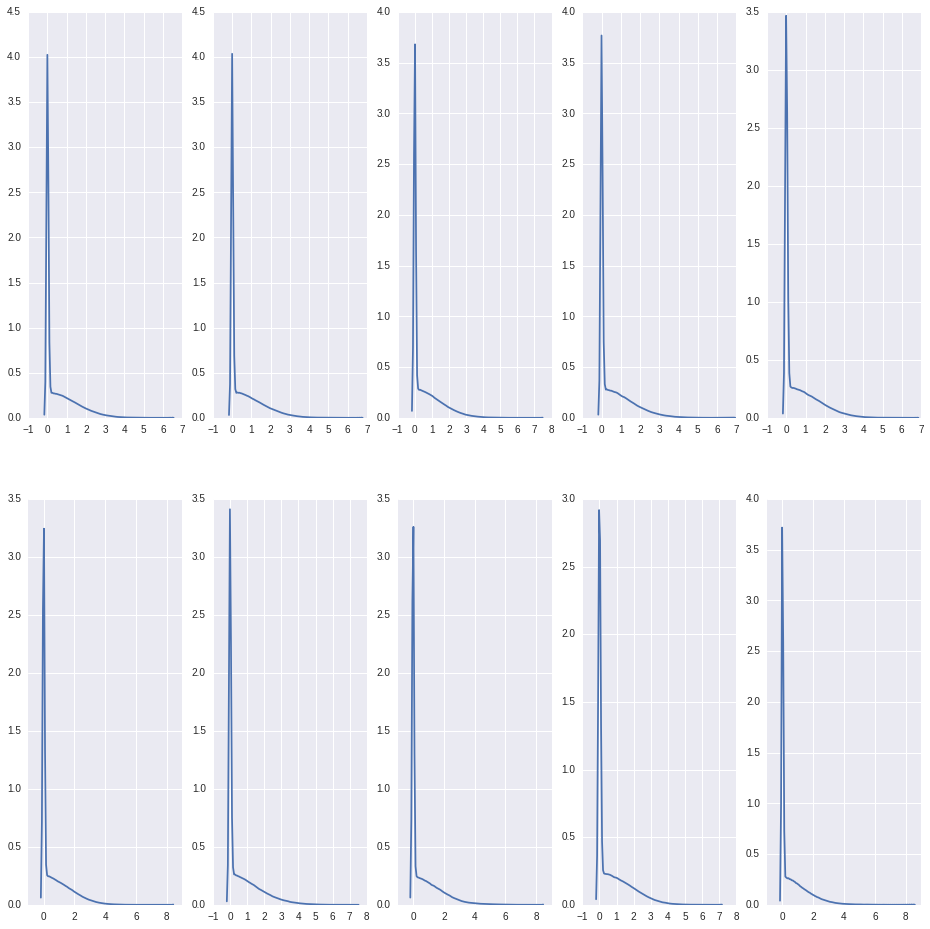

In [24]:
Hs  = {}
Ws  = {}
Zs  = {}

for idx, x in enumerate(hidden_layer_sizes):
    X = D if idx == 0 else Hs[idx-1]
    # input at this layer comes from the prior layer
    fan_in  = X.shape[1]
    fan_out = hidden_layer_sizes[idx] 
    W = np.random.randn(fan_in, fan_out) / np.sqrt((fan_in + fan_out)/ 4.)
    Ws[idx] = W
    
    H = np.dot(X, W)
    Zs[idx] = H.copy()
    H = act['relu'](H)
    #affine transformation and then use the activation function
    #there is no bias :D
    Hs[idx] = H

print("input layer had mean %g and std %g" % (np.mean(D), np.std(D)))
layer_means = [ np.mean(H) for i,H in Hs.items() ]
layer_stds  = [ np.std(H) for i,H in Hs.items() ]

for i,H in Hs.items():
    print("Hidden layer %d had mean %g and std %g" % (i, np.mean(H), np.std(H)))

#plot the means and standard deviations
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-')
ax1 = plt.subplot(121)
ax1.set_ylim([0.0,1.0])
plt.title('layer mean')

plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'or-')
ax1 = plt.subplot(122)
ax1.set_ylim([0.0,1.0])
plt.title('layer stds')

plt.figure(figsize=(16,16))
for i,H in Hs.items():
    plt.subplot( 2, len(Hs) // 2, i+1)
    sns.kdeplot(data=H.ravel())
    ax = plt.subplot( 2, len(Hs) // 2, i+1)

W_grad layer 9 had mean -0.315668 and std 14.9936
W_grad layer 8 had mean -0.196602 and std 14.8856
W_grad layer 7 had mean 0.463847 and std 14.5468
W_grad layer 6 had mean -0.242973 and std 14.0966
W_grad layer 5 had mean 0.140987 and std 13.9051
W_grad layer 4 had mean 0.310832 and std 13.7489
W_grad layer 3 had mean -0.204243 and std 13.3761
W_grad layer 2 had mean -0.246863 and std 13.2726
W_grad layer 1 had mean 0.00792189 and std 12.6416
W_grad layer 0 had mean 0.0504854 and std 12.4963
dx layer 9 had mean -0.000453869 and std 0.400176
dx layer 8 had mean -0.000259006 and std 0.399489
dx layer 7 had mean 0.000703541 and std 0.389174
dx layer 6 had mean -0.000374281 and std 0.393063
dx layer 5 had mean 0.000190989 and std 0.389262
dx layer 4 had mean 0.000492448 and std 0.388999
dx layer 3 had mean -0.000364554 and std 0.392713
dx layer 2 had mean -0.000402776 and std 0.395957
dx layer 1 had mean 8.44652e-05 and std 0.396851
dx layer 0 had mean 4.59559e-05 and std 0.395995


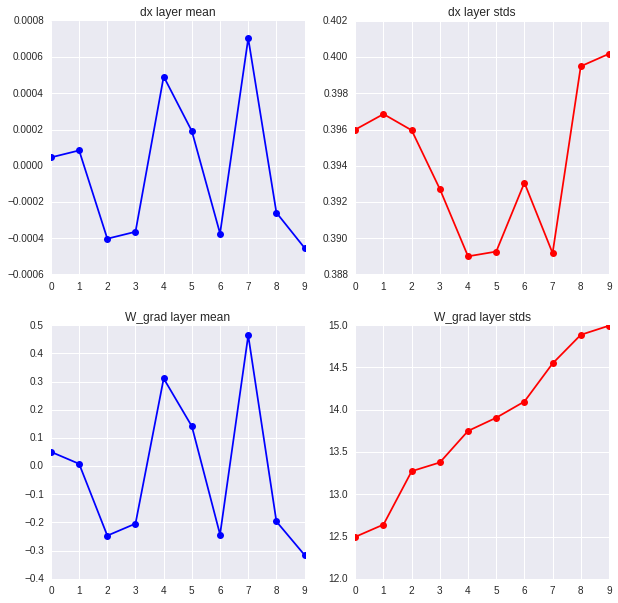

In [25]:
Dx = {}
W_grad = {}
dout = np.random.uniform(low=-1.0, high=1.0, size=(1000,500))

for i, H in reversed(list(Hs.items())):
#     W_grad[i] = np.dot(Hs[i].T, dout)
#     dout = np.dot(dout, Ws[i].T)
#     Dx[i] = dout
    X = D if i == 0 else Hs[i-1]
    dact = np.array(dout, copy=True)
    dact[Zs[i] < 0] = 0
    W_grad[i] = np.dot(dact.T, X) 
    dout = np.dot(dact, Ws[i].T)
    Dx[i] = dact

layer_means_dx = [ np.mean(H) for i,H in reversed(list(Dx.items())) ]
layer_stds_dx  = [ np.std(H) for i,H in reversed(list(Dx.items())) ]

layer_means_W_grad = [ np.mean(H) for i,H in reversed(list(W_grad.items())) ]
layer_stds_W_grad  = [ np.std(H) for i,H in reversed(list(W_grad.items())) ]

for i,W in reversed(list(W_grad.items())):
    print("W_grad layer %d had mean %g and std %g" % (i, np.mean(W), np.std(W)))

for i,dx in reversed(list(Dx.items())):
    print("dx layer %d had mean %g and std %g" % (i, np.mean(dx), np.std(dx)))

plt.figure(figsize=(10,10))

x_points = list(reversed(list(Dx.keys())))
plt.subplot(221)
plt.plot(x_points, layer_means_dx, 'ob-')
plt.title('dx layer mean')

plt.subplot(222)
plt.plot(x_points, layer_stds_dx, 'or-')
plt.title('dx layer stds')

plt.subplot(223)
plt.plot(x_points, layer_means_W_grad, 'ob-')
plt.title('W_grad layer mean')

plt.subplot(224)
plt.plot(x_points, layer_stds_W_grad, 'or-')
plt.title('W_grad layer stds')

input layer had mean -0.000588313 and std 1.00104
Hidden layer 0 had mean 0.530034 and std 0.775472
Hidden layer 1 had mean 0.477395 and std 0.713306
Hidden layer 2 had mean 0.477314 and std 0.678195
Hidden layer 3 had mean 0.422935 and std 0.625741
Hidden layer 4 had mean 0.402823 and std 0.579813
Hidden layer 5 had mean 0.348481 and std 0.530283
Hidden layer 6 had mean 0.347171 and std 0.508564
Hidden layer 7 had mean 0.297763 and std 0.449855
Hidden layer 8 had mean 0.309908 and std 0.441984
Hidden layer 9 had mean 0.275693 and std 0.397396


/home/gking/.virtualenvs/tensorflow3_build/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


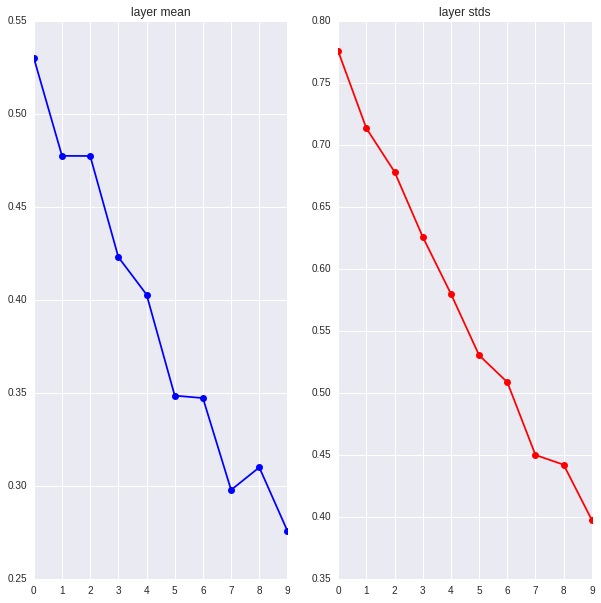

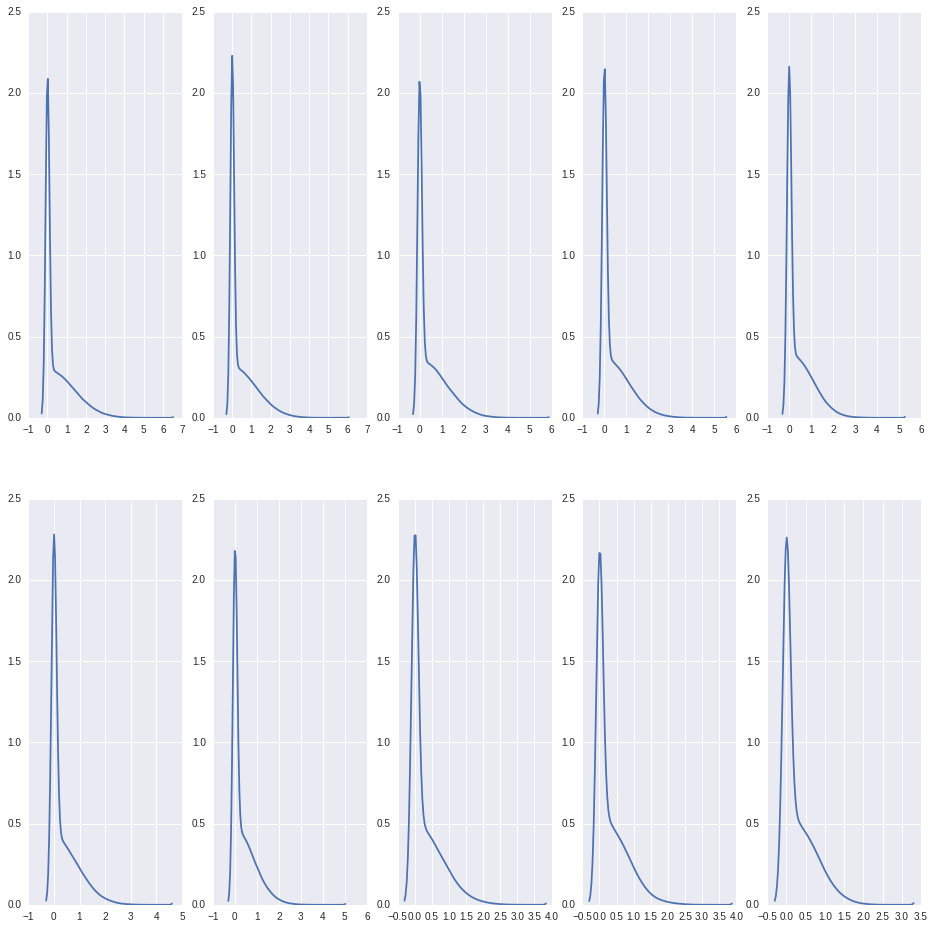

In [26]:
Hs  = {}
Ws  = {}
Zs  = {}

for idx, x in enumerate(hidden_layer_sizes):
    X = D if idx == 0 else Hs[idx-1]
    # input at this layer comes from the prior layer
    fan_in  = X.shape[1]
    fan_out = hidden_layer_sizes[idx] 
    W = np.random.randn(fan_in, fan_out) / np.sqrt((fan_in + fan_out)/ 3.5)
    Ws[idx] = W
    
    H = np.dot(X, W)
    Zs[idx] = H.copy()
    H = act['relu'](H)
    #affine transformation and then use the activation function
    #there is no bias :D
    Hs[idx] = H

print("input layer had mean %g and std %g" % (np.mean(D), np.std(D)))
layer_means = [ np.mean(H) for i,H in Hs.items() ]
layer_stds  = [ np.std(H) for i,H in Hs.items() ]

for i,H in Hs.items():
    print("Hidden layer %d had mean %g and std %g" % (i, np.mean(H), np.std(H)))

#plot the means and standard deviations
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-')
plt.title('layer mean')

plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'or-')
plt.title('layer stds')

plt.figure(figsize=(16,16))
for i,H in Hs.items():
    plt.subplot( 2, len(Hs) // 2, i+1)
    sns.kdeplot(data=H.ravel(),bw=.1)
    ax = plt.subplot( 2, len(Hs) // 2, i+1)

W_grad layer 9 had mean -0.373661 and std 7.22613
W_grad layer 8 had mean -0.254595 and std 6.86504
W_grad layer 7 had mean -0.486223 and std 7.48438
W_grad layer 6 had mean -0.297256 and std 7.18747
W_grad layer 5 had mean -0.53119 and std 7.05733
W_grad layer 4 had mean -0.571831 and std 7.00767
W_grad layer 3 had mean -0.320953 and std 7.19568
W_grad layer 2 had mean -0.372871 and std 7.04108
W_grad layer 1 had mean -0.141074 and std 7.00806
W_grad layer 0 had mean -0.010012 and std 7.05988
dx layer 9 had mean -0.00115181 and std 0.408922
dx layer 8 had mean -0.000828481 and std 0.391029
dx layer 7 had mean -0.00137803 and std 0.362462
dx layer 6 had mean -0.000873444 and std 0.340036
dx layer 5 had mean -0.00128642 and std 0.310391
dx layer 4 had mean -0.0013895 and std 0.292973
dx layer 3 had mean -0.000706942 and std 0.272402
dx layer 2 had mean -0.000786173 and std 0.258841
dx layer 1 had mean -0.000304294 and std 0.238585
dx layer 0 had mean -0.000643613 and std 0.222883


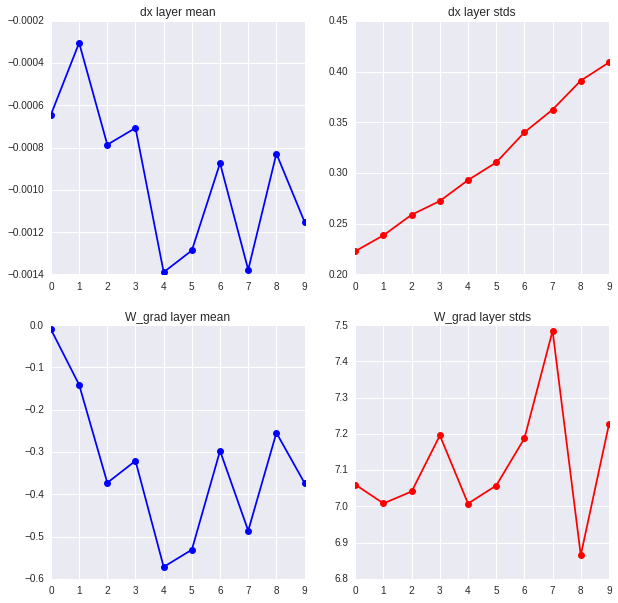

In [27]:
Dx = {}
W_grad = {}
dout = np.random.uniform(low=-1.0, high=1.0, size=(1000,500))

for i, H in reversed(list(Hs.items())):
#     W_grad[i] = np.dot(Hs[i].T, dout)
#     dout = np.dot(dout, Ws[i].T)
#     Dx[i] = dout
    X = D if i == 0 else Hs[i-1]
    dact = np.array(dout, copy=True)
    dact[Zs[i] < 0] = 0
    W_grad[i] = np.dot(dact.T, X) 
    dout = np.dot(dact, Ws[i].T)
    Dx[i] = dact

layer_means_dx = [ np.mean(H) for i,H in reversed(list(Dx.items())) ]
layer_stds_dx  = [ np.std(H) for i,H in reversed(list(Dx.items())) ]

layer_means_W_grad = [ np.mean(H) for i,H in reversed(list(W_grad.items())) ]
layer_stds_W_grad  = [ np.std(H) for i,H in reversed(list(W_grad.items())) ]

for i,W in reversed(list(W_grad.items())):
    print("W_grad layer %d had mean %g and std %g" % (i, np.mean(W), np.std(W)))

for i,dx in reversed(list(Dx.items())):
    print("dx layer %d had mean %g and std %g" % (i, np.mean(dx), np.std(dx)))

plt.figure(figsize=(10,10))

x_points = list(reversed(list(Dx.keys())))
plt.subplot(221)
plt.plot(x_points, layer_means_dx, 'ob-')
plt.title('dx layer mean')

plt.subplot(222)
plt.plot(x_points, layer_stds_dx, 'or-')
plt.title('dx layer stds')

plt.subplot(223)
plt.plot(x_points, layer_means_W_grad, 'ob-')
plt.title('W_grad layer mean')

plt.subplot(224)
plt.plot(x_points, layer_stds_W_grad, 'or-')
plt.title('W_grad layer stds')